# <font color='orange'>**Prerequisites**</font>

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# installing prerequisites
!pip install pypower
!pip install pandapower

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
from pypower import loadcase, runpf
from random import randint
import pandas as pd
import numpy as np
import pandapower.converter as pc

import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.2.0


# <font color='orange'>**Data mining**</font>

## <font color='purple'>**Playing around with the data**</font>

In [ ]:
ppc = loadcase.loadcase('drive/My Drive/Codes/research2020/cases/case33')
run = runpf.runpf(ppc, solvedcase='solved.py')

NameError: ignored

In [ ]:
# for i in range(dim[0]):
#     # V_a
#     degree = randint(-360,360)
#     ppc['bus'][i][8] = degree
from math import pi

# 50.2005088966
# ppc['bus'][0][8] = 250
# ppc['bus'][1][8] = 47
# ppc['bus'][2][8] = 2
# ppc['bus'][3][8] = 25
# ppc['bus'][4][8] = 36
# ppc['bus'][5][8] = 10
# ppc['bus'][6][8] = 0
# ppc['bus'][7][8] = 5
# ppc['bus'][8][8] = 33

run = runpf.runpf(ppc, solvedcase='solved.py')

print(run[1])


PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power flow converged in 2 iterations.

Converged in 0.02 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             14     Total Gen Capacity     772.4         -52.0 to 148.0
Generators         5     On-line Capacity       772.4         -52.0 to 148.0
Committed Gens     5     Generation (actual)    272.4              82.4
Loads             11     Load                   259.0              73.5
  Fixed           11       Fixed                259.0              73.5
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             1     Shunt (inj)             -0.0              21.2
Branches          20     Losses (I^2 * Z)        13.39             54.54
Transformers       3     Branch 

In [ ]:
run[0]['branch'][0]

array([ 1.00000000e+00,  2.00000000e+00,  1.93800000e-02,  5.91700000e-02,
        5.28000000e-02,  9.90000000e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00, -3.60000000e+02,
        3.60000000e+02,  1.56882891e+02, -2.04042917e+01, -1.52585290e+02,
        2.76762497e+01])

In [ ]:
ppc['branch'][0]

array([ 1.000e+00,  2.000e+00,  1.938e-02,  5.917e-02,  5.280e-02,
        9.900e+03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00, -3.600e+02,  3.600e+02])

In [ ]:
run[0].keys()

dict_keys(['version', 'baseMVA', 'bus', 'gen', 'branch', 'gencost', 'order', 'et', 'success'])

In [ ]:
for key in run[0].keys():
    if key in ppc:
        print(key,':')
        print(ppc[key] == run[0][key])
        print()
    else:
        print(key,'does not exist in PPC')

version :
True

baseMVA :
True

bus :
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True  True False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True  True False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True  True False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False False  True  True  True
   True]
 [ True  True  True  True  True  True  True False

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


In [ ]:
runBranch = pd.DataFrame(run[0]['branch'])
runBranch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,2.0,0.01938,0.05917,0.0528,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,1.568829e+02,-20.404292,-1.525853e+02,27.676250
1,1.0,5.0,0.05403,0.22304,0.0492,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,7.551038e+01,3.854991,-7.274751e+01,2.229359
2,2.0,3.0,0.04699,0.19797,0.0438,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,7.323758e+01,3.560203,-7.091431e+01,1.602233
3,2.0,4.0,0.05811,0.17632,0.0340,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,5.613150e+01,-1.550350,-5.445484e+01,3.020687
4,2.0,5.0,0.05695,0.17388,0.0346,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,4.151622e+01,1.170998,-4.061246e+01,-2.099034
5,3.0,4.0,0.06701,0.17103,0.0128,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,-2.328569e+01,4.473116,2.365914e+01,-4.835652
6,4.0,5.0,0.01335,0.04211,0.0000,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,-6.115823e+01,15.823642,6.167265e+01,-14.201005
7,4.0,7.0,0.00000,0.20912,0.0000,9900.0,0.0,0.0,0.978,0.0,1.0,-360.0,360.0,2.807418e+01,-9.681066,-2.807418e+01,11.384280
8,4.0,9.0,0.00000,0.55618,0.0000,9900.0,0.0,0.0,0.969,0.0,1.0,-360.0,360.0,1.607976e+01,-0.427611,-1.607976e+01,1.732322
9,5.0,6.0,0.00000,0.25202,0.0000,9900.0,0.0,0.0,0.932,0.0,1.0,-360.0,360.0,4.408732e+01,12.470680,-4.408732e+01,-8.049518


In [ ]:
ppcBranch = pd.DataFrame(ppc['branch'])
ppcBranch

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,2.0,0.01938,0.05917,0.0528,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0
1,1.0,5.0,0.05403,0.22304,0.0492,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0
2,2.0,3.0,0.04699,0.19797,0.0438,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0
3,2.0,4.0,0.05811,0.17632,0.0340,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0
4,2.0,5.0,0.05695,0.17388,0.0346,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0
5,3.0,4.0,0.06701,0.17103,0.0128,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0
6,4.0,5.0,0.01335,0.04211,0.0000,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0
7,4.0,7.0,0.00000,0.20912,0.0000,9900.0,0.0,0.0,0.978,0.0,1.0,-360.0,360.0
8,4.0,9.0,0.00000,0.55618,0.0000,9900.0,0.0,0.0,0.969,0.0,1.0,-360.0,360.0
9,5.0,6.0,0.00000,0.25202,0.0000,9900.0,0.0,0.0,0.932,0.0,1.0,-360.0,360.0


Check branches to see if they're equal:

In [ ]:
i,j = ppcBranch.shape
for row in range(i):
    for col in range(j):
        if ppcBranch[col][row] != runBranch[col][row]:
            print('{}, {}'.format(row, col))

Branches are <b>equal</b>.

Check Buses to see if they're equal:

In [ ]:
ppcBus = pd.DataFrame(ppc['bus'])
ppcBus

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.060,0.00,0.0,1.0,1.06,0.94
1,2.0,2.0,21.7,12.7,0.0,0.0,1.0,1.045,-4.98,0.0,1.0,1.06,0.94
2,3.0,2.0,94.2,19.0,0.0,0.0,1.0,1.010,-12.72,0.0,1.0,1.06,0.94
3,4.0,1.0,47.8,-3.9,0.0,0.0,1.0,1.019,-10.33,0.0,1.0,1.06,0.94
4,5.0,1.0,7.6,1.6,0.0,0.0,1.0,1.020,-8.78,0.0,1.0,1.06,0.94
5,6.0,2.0,11.2,7.5,0.0,0.0,1.0,1.070,-14.22,0.0,1.0,1.06,0.94
6,7.0,1.0,0.0,0.0,0.0,0.0,1.0,1.062,-13.37,0.0,1.0,1.06,0.94
7,8.0,2.0,0.0,0.0,0.0,0.0,1.0,1.090,-13.36,0.0,1.0,1.06,0.94
8,9.0,1.0,29.5,16.6,0.0,19.0,1.0,1.056,-14.94,0.0,1.0,1.06,0.94
9,10.0,1.0,9.0,5.8,0.0,0.0,1.0,1.051,-15.10,0.0,1.0,1.06,0.94


In [ ]:
runBus = pd.DataFrame(run[0]['bus'])
runBus

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.060000,0.000000,0.0,1.0,1.06,0.94
1,2.0,2.0,21.7,12.7,0.0,0.0,1.0,1.045000,-4.982589,0.0,1.0,1.06,0.94
2,3.0,2.0,94.2,19.0,0.0,0.0,1.0,1.010000,-12.725100,0.0,1.0,1.06,0.94
3,4.0,1.0,47.8,-3.9,0.0,0.0,1.0,1.017671,-10.312901,0.0,1.0,1.06,0.94
4,5.0,1.0,7.6,1.6,0.0,0.0,1.0,1.019514,-8.773854,0.0,1.0,1.06,0.94
5,6.0,2.0,11.2,7.5,0.0,0.0,1.0,1.070000,-14.220946,0.0,1.0,1.06,0.94
6,7.0,1.0,0.0,0.0,0.0,0.0,1.0,1.061520,-13.359627,0.0,1.0,1.06,0.94
7,8.0,2.0,0.0,0.0,0.0,0.0,1.0,1.090000,-13.359627,0.0,1.0,1.06,0.94
8,9.0,1.0,29.5,16.6,0.0,19.0,1.0,1.055932,-14.938521,0.0,1.0,1.06,0.94
9,10.0,1.0,9.0,5.8,0.0,0.0,1.0,1.050985,-15.097288,0.0,1.0,1.06,0.94


In [ ]:
i,j = ppcBus.shape
for row in range(i):
    for col in range(j):
        if ppcBus[col][row] - runBus[col][row] > 1e-6:
            print('{}, {}'.format(row, col),runBus[col][row],ppcBus[col][row])

1, 8 -4.982589141866729 -4.98
2, 8 -12.72509993802528 -12.72
3, 7 1.0176708536972445 1.019
4, 7 1.0195138598224718 1.02
5, 8 -14.220946463441628 -14.22
6, 7 1.0615195324936588 1.062
8, 7 1.055931720639651 1.056
9, 7 1.0509846250020822 1.051
10, 7 1.0569065185415227 1.057
10, 8 -14.790622031074772 -14.79
11, 8 -15.075584520162348 -15.07
13, 7 1.0355299458557004 1.036


They are <b>NOT equal</b>.

In [ ]:
res = pd.DataFrame(run[0]['order']).transpose()
res

,e2i,i2e,status,bus,branch,gen,gencost
bus,"[0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, ...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","{'on': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...",NaN,NaN,NaN,NaN
gen,"[0, 1, 2, 3, 4]","[0, 1, 2, 3, 4]","{'on': [0, 1, 2, 3, 4], 'off': []}",NaN,NaN,NaN,NaN
branch,NaN,NaN,"{'on': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...",NaN,NaN,NaN,NaN
state,e,e,e,e,e,e,e
int,NaN,NaN,NaN,"[[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.06, 0.0...","[[0.0, 1.0, 0.01938, 0.05917, 0.0528, 9900.0, ...","[[0.0, 232.3932723532582, -16.549300542088282,...","[[2.0, 0.0, 0.0, 3.0, 0.0430293, 20.0, 0.0], [..."


In [ ]:
pd.DataFrame(res['branch']['int'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.01938,0.05917,0.0528,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,1.568829e+02,-20.404292,-1.525853e+02,27.676250
1,0.0,4.0,0.05403,0.22304,0.0492,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,7.551038e+01,3.854991,-7.274751e+01,2.229359
2,1.0,2.0,0.04699,0.19797,0.0438,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,7.323758e+01,3.560203,-7.091431e+01,1.602233
3,1.0,3.0,0.05811,0.17632,0.0340,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,5.613150e+01,-1.550350,-5.445484e+01,3.020687
4,1.0,4.0,0.05695,0.17388,0.0346,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,4.151622e+01,1.170998,-4.061246e+01,-2.099034
5,2.0,3.0,0.06701,0.17103,0.0128,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,-2.328569e+01,4.473116,2.365914e+01,-4.835652
6,3.0,4.0,0.01335,0.04211,0.0000,9900.0,0.0,0.0,0.000,0.0,1.0,-360.0,360.0,-6.115823e+01,15.823642,6.167265e+01,-14.201005
7,3.0,6.0,0.00000,0.20912,0.0000,9900.0,0.0,0.0,0.978,0.0,1.0,-360.0,360.0,2.807418e+01,-9.681066,-2.807418e+01,11.384280
8,3.0,8.0,0.00000,0.55618,0.0000,9900.0,0.0,0.0,0.969,0.0,1.0,-360.0,360.0,1.607976e+01,-0.427611,-1.607976e+01,1.732322
9,4.0,5.0,0.00000,0.25202,0.0000,9900.0,0.0,0.0,0.932,0.0,1.0,-360.0,360.0,4.408732e+01,12.470680,-4.408732e+01,-8.049518


In [ ]:
pc.from_ppc(ppc).keys()

/usr/local/lib/python3.6/dist-packages/pandapower/converter/pypower/from_ppc.py:222: RuntimeWarning: divide by zero encountered in double_scalars
  max_i_ka = ppc['branch'][i, 5]/ppc['bus'][to_bus, 9]/sqrt(3)
/usr/local/lib/python3.6/dist-packages/pandapower/converter/pypower/from_ppc.py:230: RuntimeWarning: divide by zero encountered in double_scalars
  c_nf_per_km=ppc['branch'][i, 4]/Zni/omega*1e9/2,
/usr/local/lib/python3.6/dist-packages/pandapower/converter/pypower/from_ppc.py:230: RuntimeWarning: invalid value encountered in double_scalars
  c_nf_per_km=ppc['branch'][i, 4]/Zni/omega*1e9/2,


dict_keys(['bus', 'load', 'sgen', 'storage', 'gen', 'switch', 'shunt', 'ext_grid', 'line', 'trafo', 'trafo3w', 'impedance', 'dcline', 'ward', 'xward', 'measurement', 'pwl_cost', 'poly_cost', 'controller', 'line_geodata', 'bus_geodata', '_empty_res_bus', '_empty_res_ext_grid', '_empty_res_line', '_empty_res_trafo', '_empty_res_trafo3w', '_empty_res_load', '_empty_res_sgen', '_empty_res_storage', '_empty_res_gen', '_empty_res_shunt', '_empty_res_impedance', '_empty_res_dcline', '_empty_res_ward', '_empty_res_xward', '_ppc', '_is_elements', '_pd2ppc_lookups', 'version', 'converged', 'name', 'f_hz', 'sn_mva', 'std_types', 'res_bus', 'res_line', 'res_trafo', 'res_trafo3w', 'res_impedance', 'res_ext_grid', 'res_load', 'res_sgen', 'res_storage', 'res_shunt', 'res_gen', 'res_ward', 'res_xward', 'res_dcline', 'user_pf_options'])

In [ ]:
pc.from_ppc(ppc)['gen']

/usr/local/lib/python3.6/dist-packages/pandapower/converter/pypower/from_ppc.py:222: RuntimeWarning: divide by zero encountered in double_scalars
  max_i_ka = ppc['branch'][i, 5]/ppc['bus'][to_bus, 9]/sqrt(3)
/usr/local/lib/python3.6/dist-packages/pandapower/converter/pypower/from_ppc.py:230: RuntimeWarning: divide by zero encountered in double_scalars
  c_nf_per_km=ppc['branch'][i, 4]/Zni/omega*1e9/2,
/usr/local/lib/python3.6/dist-packages/pandapower/converter/pypower/from_ppc.py:230: RuntimeWarning: invalid value encountered in double_scalars
  c_nf_per_km=ppc['branch'][i, 4]/Zni/omega*1e9/2,


,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,type,controllable,min_p_mw,max_p_mw
0,None,1,40.0,1.045,NaN,-40.0,50.0,1.0,False,True,None,True,0.0,140.0
1,None,2,0.0,1.010,NaN,0.0,40.0,1.0,False,True,None,True,0.0,100.0
2,None,5,0.0,1.070,NaN,-6.0,24.0,1.0,False,True,None,True,0.0,100.0
3,None,7,0.0,1.090,NaN,-6.0,24.0,1.0,False,True,None,True,0.0,100.0


## <font color='purple'>**Obtaining Data**</font>

In [ ]:
from random import randint, sample

# Second version of the method
# Only taking brach data
def create_a_case(bus=9):
    # Importing the case
    ppc = loadcase.loadcase('drive/My Drive/Codes/research2020/cases/case'+str(bus))

    # Modification to the default values of the case
    for i in range(len(ppc['bus'])):
      ppc['bus'][i, 2] = 0
      ppc['bus'][i, 3] = 0

    buses_range = list(range(0, bus))
    rearranged_buses = sample(buses_range, bus)

    # num_of_gen = randint(1, bus - 1)
    num_of_gen = 3
    gen_nums = rearranged_buses[:num_of_gen]

    gen_power_sum = 0
    for index, bus_index in enumerate(gen_nums):
      ppc['gen'][index, 0] = bus_index + 1
      gen_power = randint(0, 4000)  / 10
      ppc['gen'][index, 1] = gen_power
      gen_power_sum += int(gen_power)

    # num_of_load = randint(1, bus - 1)
    num_of_load = 3
    load_nums = rearranged_buses[num_of_gen:num_of_gen + num_of_load]

    load_sum = 0
    for index, bus_index in enumerate(load_nums):
      load = randint(0, gen_power_sum - load_sum)
      ppc['bus'][bus_index, 2] = load
      load_sum += load
      ppc['bus'][bus_index, 3] = randint(30, 50)

    # Old deployment
    # ppc['gen'][0, 1] = randint(0, 4000) / 10
    # ppc['gen'][1, 1] = randint(0, 4000) / 10
    # ppc['gen'][2, 1] = randint(0, 4000) / 10
    # ppc['bus'][4, 2] = randint(0, 4000) / 10
    # ppc['bus'][6, 2] = randint(0, 4000) / 10
    # ppc['bus'][8, 2] = randint(0, 4000) / 10

    # Calculating the data
    try:
      run, success = runpf.runpf(ppc,)
    except Exception as E:
      return create_a_case(bus=bus)

    # Check to see if it was successful
    if not success:
        return create_a_case(bus=bus)

    # Adding from bus to bus of BRANCHES
    X = run['branch'][:,[0,1,2,3,4,5,6,7,13,14,15,16]].flatten()

    # Declaring Y with current gen values
    Y = np.zeros(bus * 2)
    for gen in run['gen']:
      bus_index = gen[0] - 1
      Y[2 * bus_index] = gen[1]
      Y[2 * bus_index + 1] = gen[2]

    # Y = run['gen'][:,[1,2]].flatten()

    # Filling Y with 0s until 2n buses meet
    # while len(Y) < (2 * bus):
        # Y = np.append(Y, [0])


    return X, Y

In [ ]:
# testing the function create_a_case()
X, Y = create_a_case(39)
print(X, Y)

Streaming output truncated to the last 5000 lines.
   9      5      6    112.04    -23.53   -112.02     19.74     0.027      0.35
  10      5      8   -318.92    -62.26    319.80     60.34     0.879     12.30
  11      6      7   -281.16    -47.72    281.67     44.65     0.508      7.79
  12      6     11    457.80     22.99   -456.26    -18.11     1.543     18.08
  13      6     31    -24.59     -0.22     24.59      0.40    -0.000      0.18
  14      7      8   -278.93    -46.07    279.26     42.30     0.329      3.79
  15      8      9   -549.61    -93.52    556.89    169.02     7.275    114.82
  16      9     39   -556.21     60.78    559.19   -115.77     2.973     74.33
  17     10     11   -456.20     -6.70    457.08      9.34     0.885      9.52
  18     10     13    240.02     62.96   -239.76    -66.96     0.264      2.84
  19     10     32    572.78    112.67   -572.78    -29.71    -0.000     82.97
  20     12     11    -33.40     -5.56     33.42      6.09     0.020      0.53
 

RecursionError: ignored

In [ ]:
# from time import time

def create_n_cases(n=10, bus=9, batch=None):
    # initial_time = time()
    X, Y = create_a_case(bus=bus)
    for i in range(n - 1):
        x, y = create_a_case(bus=bus)
        X = np.vstack((X, x))
        Y = np.vstack((Y, y))

        print(str(((i + 1) / (n - 1)) * 100))

    if batch:
      np.savetxt('drive/My Drive/Codes/research2020/dataset/X_braches_vargen{}.csv'.format(batch), X, delimiter=',')
      np.savetxt('drive/My Drive/Codes/research2020/dataset/Y_braches_vargen{}.csv'.format(batch), Y, delimiter=',')

    return X, Y

In [ ]:
#testing the function create_n_cases()
X, Y = create_n_cases(n=1000, batch=6)

In [ ]:
print(X.shape)
print(Y.shape)

(1000, 108)
(1000, 18)


## <font color='purple'>**Saving the obtained data**</font>

In [ ]:
np.savetxt('drive/My Drive/X_braches_vargen.csv', X, delimiter=',')
np.savetxt('drive/My Drive/Y_braches_vargen.csv', Y, delimiter=',')

In [ ]:
xpd = pd.DataFrame(X)
ypd = pd.DataFrame(Y)
data = pd.concat([ypd,xpd], axis=1)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,0,1,2,3,4,5,6,7,8,9,10,11,12,...,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171
0,1,335,133,2,173,73,3,207,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.943136,0.939407,0.973895,0.929567,0.960051,0.876473,0.0,-15.388674,-7.461890,...,-360.0,360.0,-173.0,-51.592112,173.0,73.691787,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,61.010007,26.302023,-59.150931,-42.804049,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-265.849069,-7.195951,275.049215,70.809343
1,1,206,80,2,199,38,3,144,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.961279,0.923541,0.990234,0.973240,0.983169,0.917351,0.0,8.309779,4.225457,...,-360.0,360.0,-199.0,-13.838629,199.0,39.567759,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,133.392879,13.649370,-127.234546,-10.330002,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-94.765454,-39.669998,95.956316,34.255136
2,1,278,184,2,400,173,3,218,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.907831,0.830366,0.948891,0.904269,0.926188,0.832398,0.0,22.089822,6.589653,...,-360.0,360.0,-400.0,-54.376463,400.0,173.104746,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,194.504761,38.993618,-179.378708,13.383466,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-99.621292,-63.383466,101.527247,66.234088
3,1,502,273,2,5,106,3,290,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.890842,0.832110,0.937666,0.890847,0.933280,0.847339,0.0,-44.757998,-21.395432,...,-360.0,360.0,-5.0,-99.621057,5.0,106.760280,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-70.668742,57.918165,74.368300,-63.616385,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,-243.368300,13.616385,251.672883,43.670640
4,1,-263,181,2,99,61,3,324,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0,1.0,1.0,1.0,0.908311,0.872903,0.964134,0.948647,0.963596,0.875679,0.0,37.596695,55.978089,...,-360.0,360.0,-99.0,-52.944516,99.0,61.428559,8.0,9.0,0.032,0.161,0.306,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,167.416387,29.736806,-157.091363,-3.727585,9.0,4.0,0.01,0.085,0.176,250.0,250.0,250.0,0.0,0.0,1.0,-360.0,360.0,104.091363,-46.272415,-102.474647,46.006285


In [ ]:
data.to_csv('drive/My Drive/YX.csv', index=False,sep=',')

## <font color='purple'>**Adjusting Data for decentrilized model**</font>

### **Only branch data related to the bus**

In [ ]:
X_copy = X.copy(deep=True)
X_copy = X_copy.values.reshape(42000, 9, 12)
X_copy.shape
bus_num = 4
from_bus = X_copy[:,:,0] == bus_num
to_bus = X_copy[:,:,1] == bus_num
x = X_copy[from_bus | to_bus]
x = x.reshape(42000, 3, 12)
X = x

# <font color='orange'>**Centrilized learning Models**

## <font color='purple'>**Dataset**

In [ ]:
# importing saved X and Y from multiple files
import os
import glob

all_filenames_X = [i for i in glob.glob('drive/My Drive/Codes/research2020/dataset/X_braches_vargen*.csv')]
all_filenames_X
X = pd.concat([pd.read_csv(f, header=None) for f in all_filenames_X ])

all_filenames_Y = [i for i in glob.glob('drive/My Drive/Codes/research2020/dataset/Y_braches_vargen*.csv')]
all_filenames_Y
Y = pd.concat([pd.read_csv(f, header=None) for f in all_filenames_Y ])

In [ ]:
# importing saved X and Y from a single file
X = pd.read_csv('drive/My Drive/Codes/research2020/X_braches.csv',header=None)
Y = pd.read_csv('drive/My Drive/Codes/research2020/Y_braches.csv',header=None)

In [ ]:
print(X.shape)
print(Y.shape)

(42000, 108)
(42000, 18)


In [ ]:
# Zero-centring and normalizing the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X -= mean
# X /= std

In [ ]:
# partition data to training and testing datasets
X_train = X.sample(frac=0.60,random_state=0)
X_test = X.drop(X_train.index)

Y_train = Y.sample(frac=0.60,random_state=0)
Y_test = Y.drop(Y_train.index)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(25200, 108)
(868, 108)


In [ ]:
sns.pairplot(X_train[[13, 14, 15, 16]], diag_kind="kde")

## <font color='purple'>**Models**</font>

### <font color='olive'>**Basic Neural Network**</font><br>


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(108, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(18)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
basicNN = build_model()

In [ ]:
basicNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 108)               11772     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                6976      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 64)               

In [ ]:
example_batch = X[:3]
example_result = basicNN.predict(example_batch)
example_result

array([[ 0.9,  2.7,  1.3,  5.8,  2.6,  1.3, -2.6, -1. ,  0.2,  3.3,  2.9,
         0.1, -0.4, -0. , -0.6, -2. ,  3.3,  2.6],
       [-1. ,  3.9,  0.3,  4.1,  2.5, -0.3, -2.7, -4.1,  0.9, -0.1,  2.5,
         0.4, -2. ,  1.9, -1. , -1.9,  6.2,  2.1],
       [ 2.6, 10.9, -0.3,  8.8, 14.9, -7.7, -5.4, -6.1,  4.9,  2.1,  8.8,
        -4.8, -3.7, -5.2,  4.6,  3.5, 22.7,  3.3]], dtype=float32)

In [ ]:
EPOCHS = 2000

history = basicNN.fit(
  X_train, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:709.0159,  mae:13.6822,  mse:709.0159,  val_loss:128.8710,  val_mae:7.5497,  val_mse:128.8710,  
....................................................................................................
Epoch: 100, loss:22.7816,  mae:2.4645,  mse:22.7816,  val_loss:18.6538,  val_mae:2.3169,  val_mse:18.6538,  
....................................................................................................
Epoch: 200, loss:15.4671,  mae:2.0477,  mse:15.4671,  val_loss:11.4510,  val_mae:1.9438,  val_mse:11.4510,  
....................................................................................................
Epoch: 300, loss:12.5588,  mae:1.8479,  mse:12.5588,  val_loss:13.8929,  val_mae:1.9182,  val_mse:13.8929,  
....................................................................................................
Epoch: 400, loss:10.6551,  mae:1.6943,  mse:10.6551,  val_loss:22.4022,  val_mae:2.4809,  val_mse:22.4022,  
...............................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1995,3.593783,0.979102,3.593783,2.698699,0.805698,2.698699,1995
1996,3.547902,0.976539,3.547902,5.136363,1.195440,5.136363,1996
1997,3.513555,0.960722,3.513555,2.790123,0.887654,2.790123,1997
1998,3.550111,0.974904,3.550111,3.107263,0.923372,3.107263,1998
1999,3.546433,0.964654,3.546433,2.705446,0.999170,2.705446,1999


Text(0, 0.5, 'LOSS')

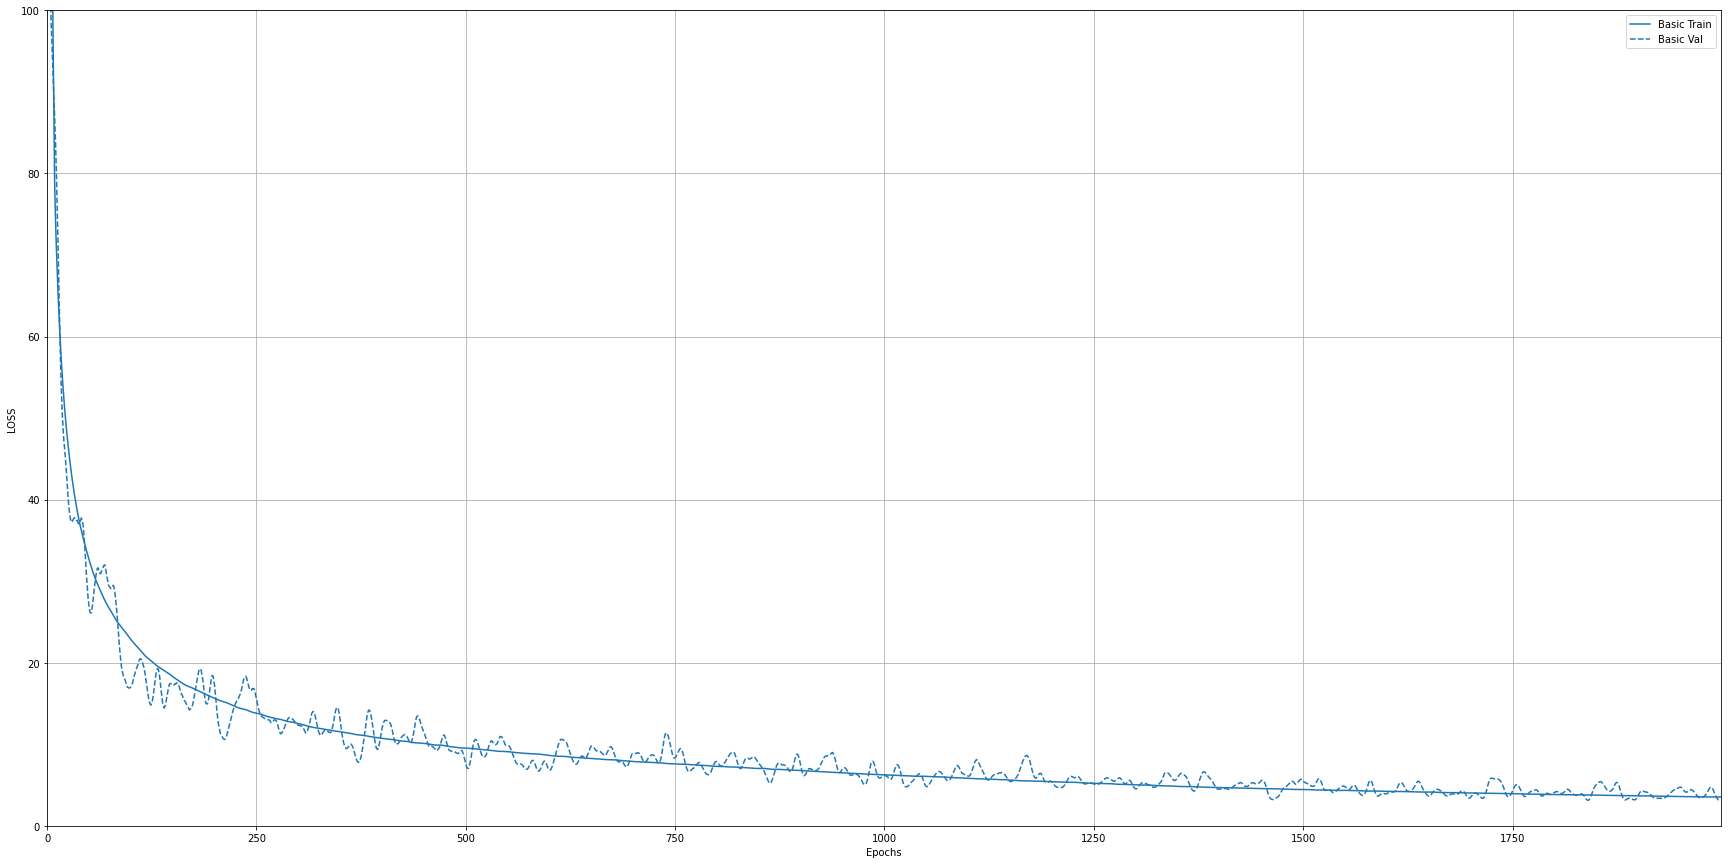

In [ ]:
plt.figure(figsize=(30,15))
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 100])
plt.ylabel('LOSS')

Text(0, 0.5, 'MAE')

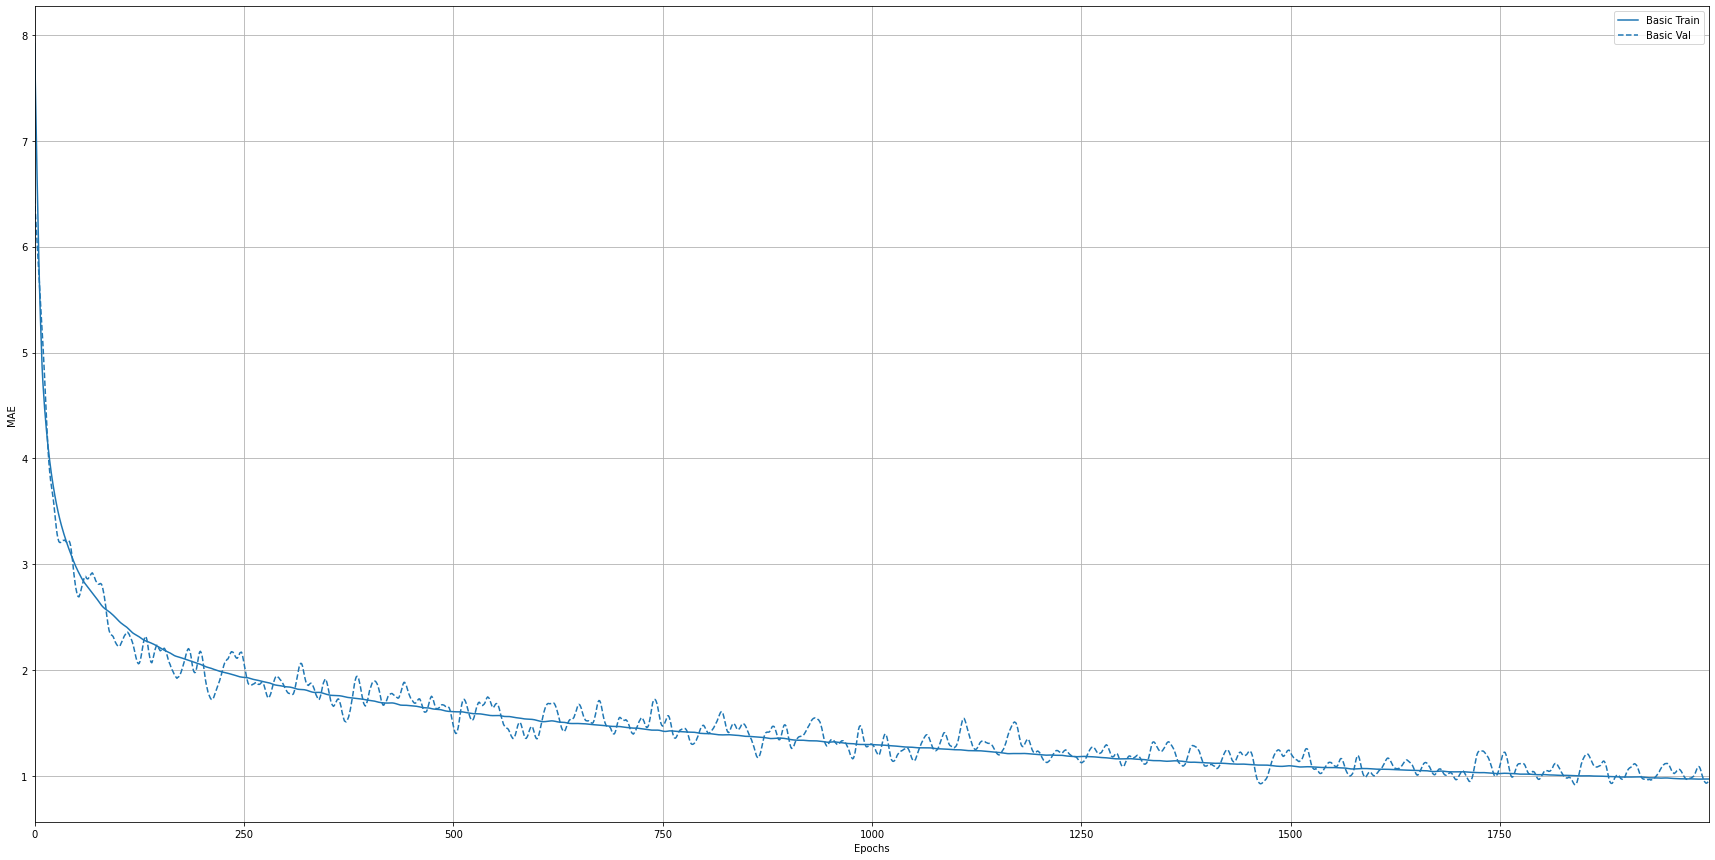

In [ ]:
plt.figure(figsize=(30,15))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([0, 10])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

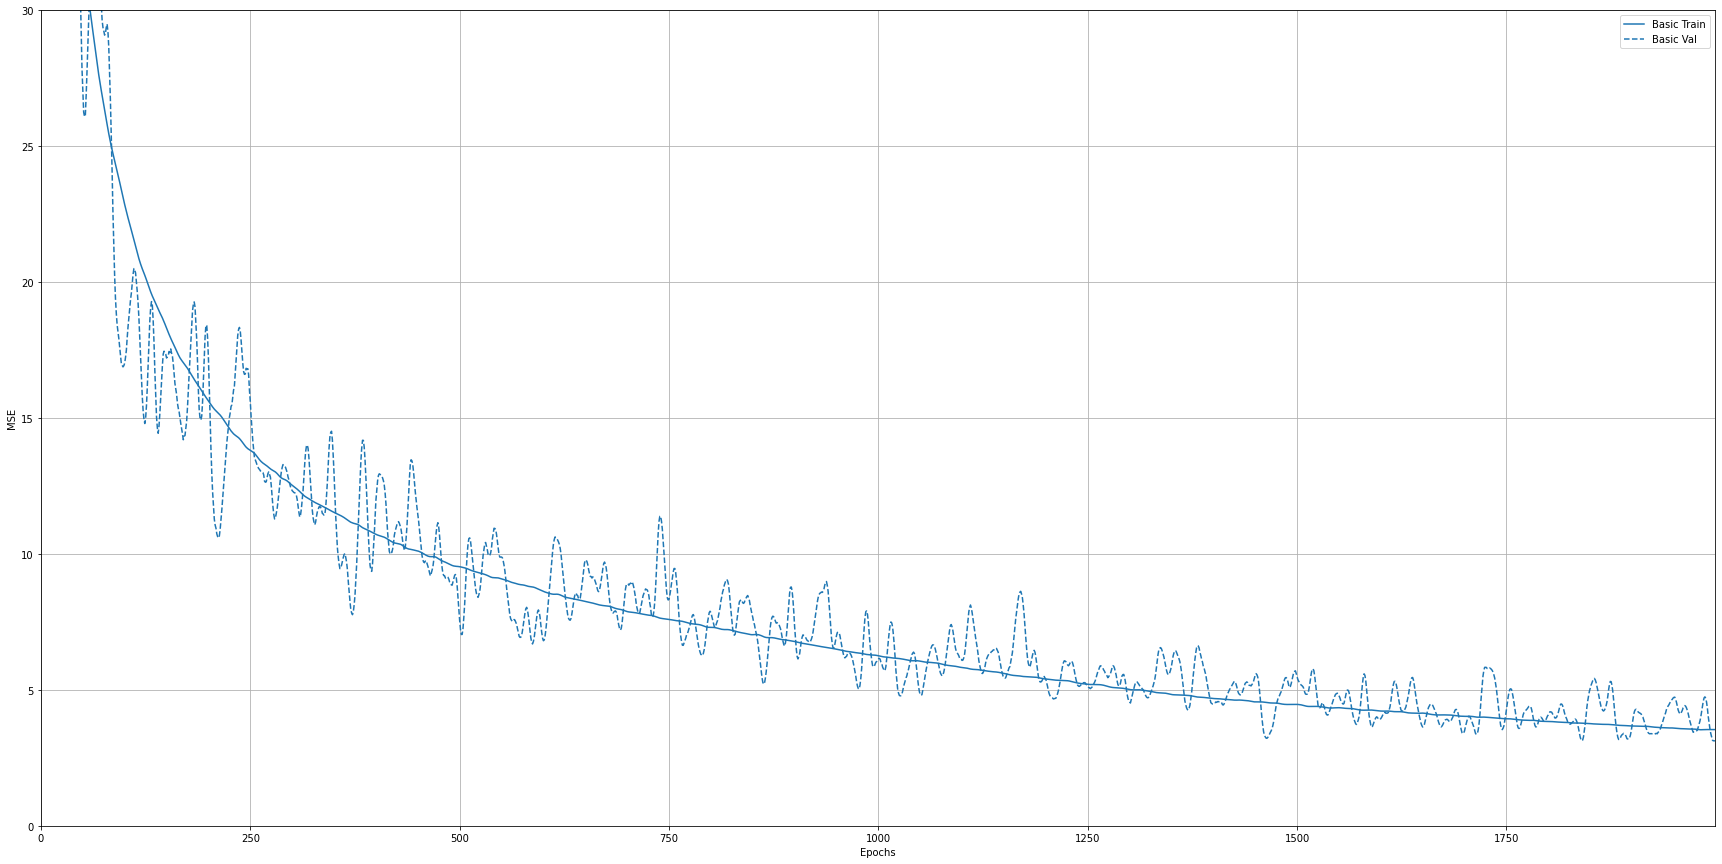

In [ ]:
plt.figure(figsize=(30,15))
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 30])
plt.ylabel('MSE')

In [ ]:
loss, mae, mse = basicNN.evaluate(X_test, Y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

94/94 - 0s - loss: 2.7363 - mae: 0.9958 - mse: 2.7363
Testing set Mean Abs Error:  1.00 MPG


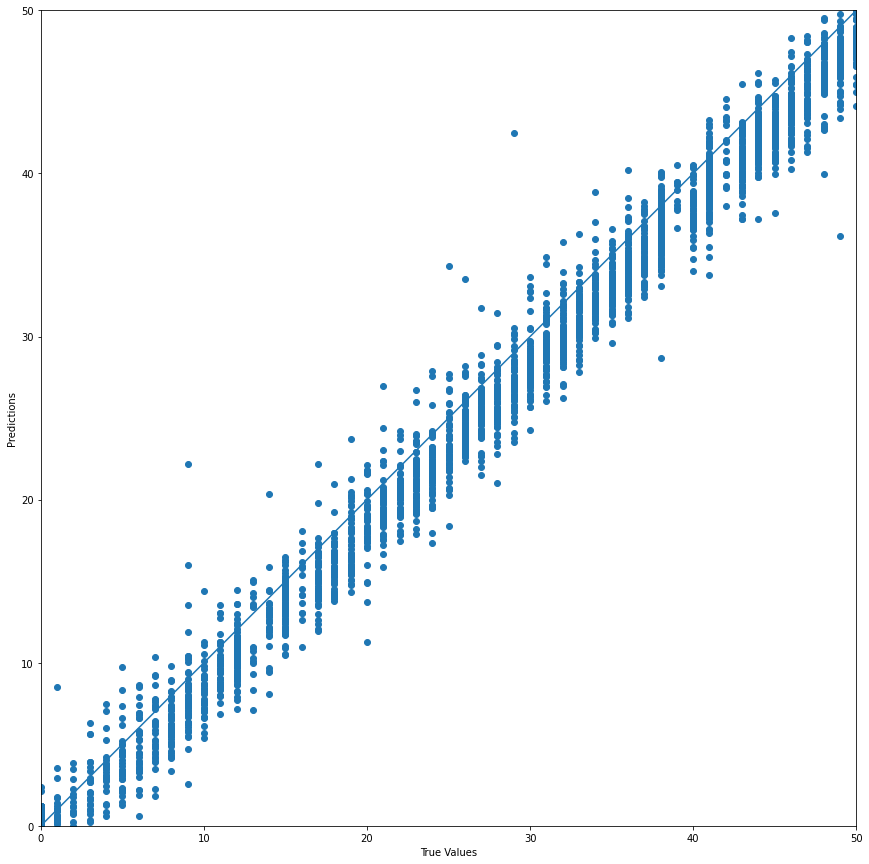

In [ ]:
test_predictions = basicNN.predict(X_test).flatten()

plt.figure(figsize=(15,15))
a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
# lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

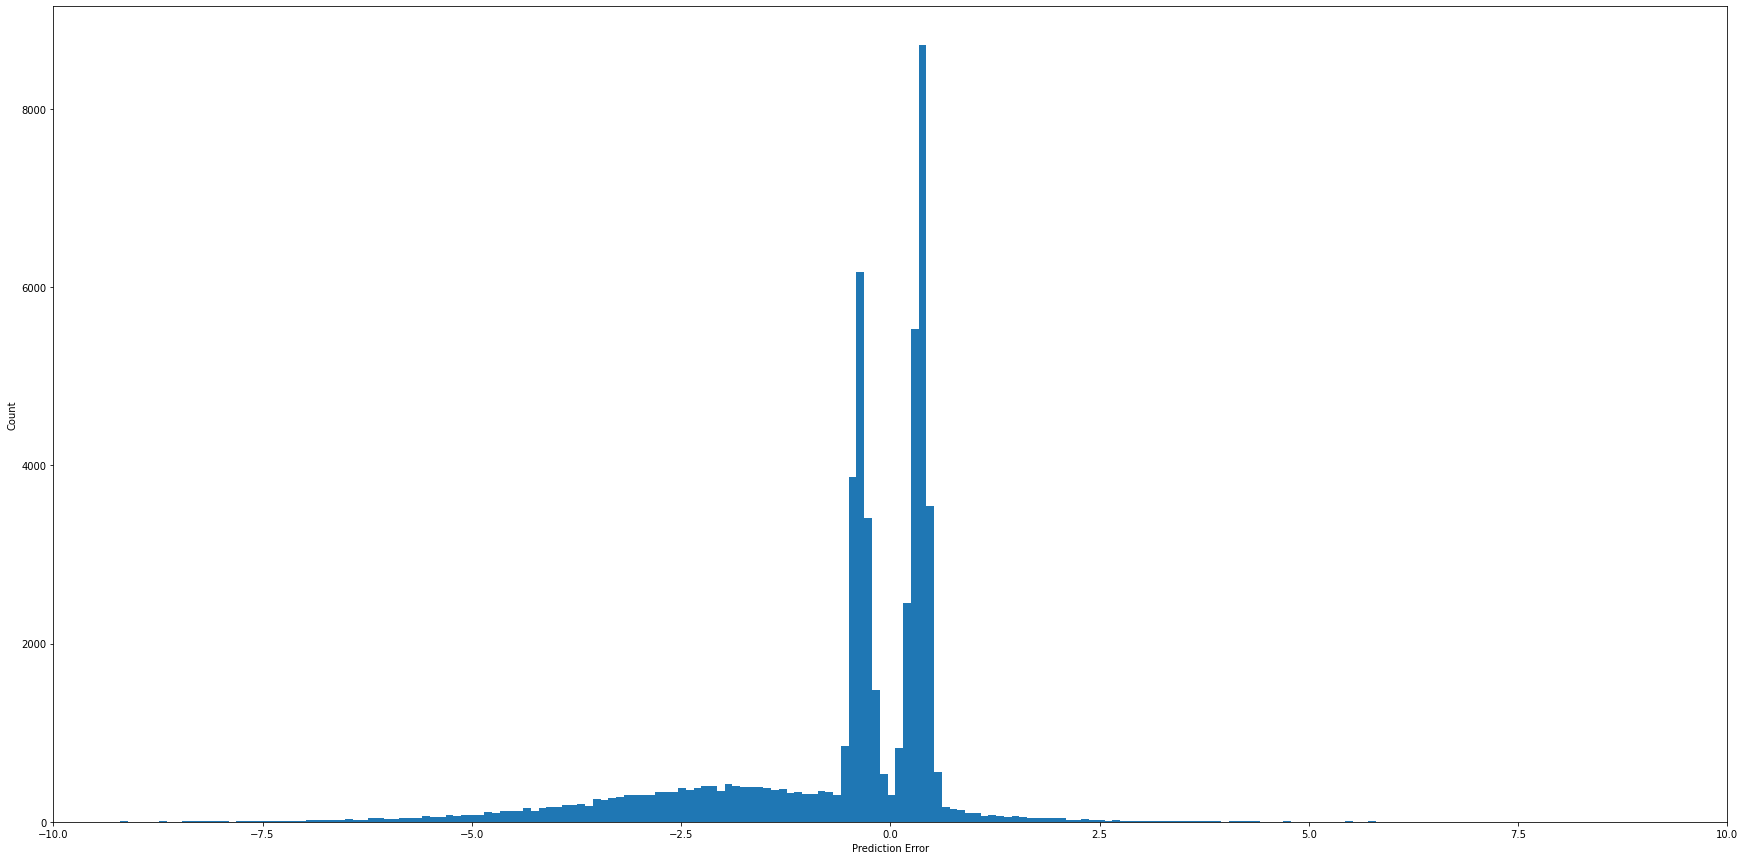

In [ ]:
error = test_predictions.flatten() - np.array(Y_test).flatten()
plt.figure(figsize=(30, 15))
plt.hist(error, bins = 500)
plt.xlim([-10, 10])
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [ ]:
# Number of samples
n = 3
x, y = create_n_cases(n=n)

# Normalizing
x -= mean
# x /= np.std(X, axis=0)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power flow converged in 5 iterations.

Converged in 0.03 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              9     Total Gen Capacity     820.0        -900.0 to 900.0
Generators         3     On-line Capacity       820.0        -900.0 to 900.0
Committed Gens     3     Generation (actual)    375.0             315.0
Loads              3     Load                   338.7             115.0
  Fixed            3       Fixed                338.7             115.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           9     Losses (I^2 * Z)        35.99            317.38
Transformers       0     Branch 

In [ ]:
y_pred = basicNN.predict(x)
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True)
for i in range(len(y)):
  print('Case:', str(i + 1))
  table_pred = pd.DataFrame(y_pred[i].reshape(9, 2)).rename(columns={0:"Voltage Mag (Prediction)", 1:"Voltage Ang (Prediction)"})
  table_actu = pd.DataFrame(y[i].reshape(9, 2)).rename(columns={0:"Voltage Mag (True Value)", 1:"Voltage Ang (True Value)"})
  table = table_actu.copy()
  table.insert(1, 'Voltage Mag (Prediction)', table_pred['Voltage Mag (Prediction)'])
  table.insert(3, 'Voltage Ang (Prediction)', table_pred['Voltage Ang (Prediction)'])
  display(table)
  print()

Case: 1


,Voltage Mag (True Value),Voltage Mag (Prediction),Voltage Ang (True Value),Voltage Ang (Prediction)
0,-68,-71.553764,118,112.801056
1,393,387.854553,146,139.995575
2,50,46.089622,51,46.314335
3,0,0.511920,0,0.511912
4,0,-0.511927,0,-0.511812
5,0,0.511907,0,-0.511925
6,0,-0.511813,0,0.511914
7,0,0.511925,0,0.511926
8,0,0.511921,0,-0.511908


Case: 2


,Voltage Mag (True Value),Voltage Mag (Prediction),Voltage Ang (True Value),Voltage Ang (Prediction)
0,366,363.150604,187,184.452682
1,301,298.208435,96,95.239761
2,87,86.730247,66,62.720383
3,0,0.376041,0,0.376028
4,0,-0.376051,0,-0.375863
5,0,0.376019,0,-0.376048
6,0,-0.375863,0,0.376029
7,0,0.376047,0,0.376049
8,0,0.376042,0,-0.376020


Case: 3


,Voltage Mag (True Value),Voltage Mag (Prediction),Voltage Ang (True Value),Voltage Ang (Prediction)
0,307,305.363647,86,83.810806
1,169,167.165710,54,54.107738
2,162,160.190094,43,41.245113
3,0,0.321523,0,0.321499
4,0,-0.321541,0,-0.321199
5,0,0.321484,0,-0.321537
6,0,-0.321199,0,0.321502
7,0,0.321535,0,0.321539
8,0,0.321525,0,-0.321485


#### <font color="darkblue">**Saving model**</font>

In [ ]:
basicNN.save('drive/My Drive/Codes/research2020/models/basicNN_week6')

INFO:tensorflow:Assets written to: drive/My Drive/Codes/research2020/models/basicNN_week6/assets


### <font color='olive'>**Convolutional Neural Network**</font>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
X_train_CNN = np.array(X_train)
X_train_CNN = X_train_CNN.reshape((X_train.shape[0], 9, 12, 1))

Y_train_CNN = np.array(Y_train)
# Y_train_CNN = Y_train_CNN.reshape((12000, 9, 2, 1))

X_test_CNN = np.array(X_test)
X_test_CNN = X_test_CNN.reshape((X_test.shape[0], 9, 12, 1))

Y_test_CNN = np.array(Y_test)
# Y_test_CNN = Y_test_CNN.reshape((3000, 9, 2, 1))

In [ ]:
CNN = models.Sequential()
CNN.add(layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='SAME', input_shape=(9, 12, 1),))
CNN.add(layers.MaxPooling2D((2, 2), padding='SAME'))
CNN.add(layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='SAME'))
# CNN.add(layers.MaxPooling2D((2, 2), padding='SAME'))
CNN.add(layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='SAME'))
# CNN.add(layers.MaxPooling2D((2, 2), padding='SAME'))
CNN.add(layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='SAME'))
CNN.add(layers.MaxPooling2D((2, 2), padding='SAME'))
CNN.add(layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='SAME'))
CNN.add(layers.MaxPooling2D((2, 2), padding='SAME'))
CNN.add(layers.Conv2D(128, (3, 3), activation=tf.nn.leaky_relu, padding='SAME'))

In [ ]:
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 9, 12, 128)        1280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 6, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 6, 128)         147584    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 6, 128)         147584    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 5, 6, 128)         147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)        

In [ ]:
CNN.add(layers.Flatten())
CNN.add(layers.Dense(128, activation=tf.nn.leaky_relu))
CNN.add(layers.Dense(128, activation=tf.nn.leaky_relu))
CNN.add(layers.Dense(128, activation=tf.nn.leaky_relu))
CNN.add(layers.Dense(18))

In [ ]:
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 9, 12, 128)        1280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 6, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 6, 128)         147584    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 6, 128)         147584    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 5, 6, 128)         147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)        

In [ ]:
# optimizer = tf.keras.optimizers.RMSprop(0.001)

CNN.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy', 'mae', 'mse'])


In [ ]:
history = CNN.fit(X_train_CNN, Y_train_CNN, epochs=3000,
                    validation_data=(X_test_CNN, Y_test_CNN), verbose=2, )

Streaming output truncated to the last 5000 lines.
1050/1050 - 5s - loss: 1.4282 - accuracy: 0.9917 - mae: 0.5720 - mse: 1.4282 - val_loss: 1.5633 - val_accuracy: 1.0000 - val_mae: 0.5863 - val_mse: 1.5633
Epoch 502/3000
1050/1050 - 5s - loss: 2.0860 - accuracy: 0.9898 - mae: 0.7018 - mse: 2.0860 - val_loss: 1.3312 - val_accuracy: 1.0000 - val_mae: 0.5690 - val_mse: 1.3312
Epoch 503/3000
1050/1050 - 5s - loss: 1.9818 - accuracy: 0.9901 - mae: 0.6759 - mse: 1.9818 - val_loss: 2.6443 - val_accuracy: 1.0000 - val_mae: 0.6884 - val_mse: 2.6443
Epoch 504/3000
1050/1050 - 5s - loss: 1.5127 - accuracy: 0.9907 - mae: 0.6121 - mse: 1.5127 - val_loss: 2.7698 - val_accuracy: 1.0000 - val_mae: 0.7741 - val_mse: 2.7698
Epoch 505/3000
1050/1050 - 5s - loss: 2.2881 - accuracy: 0.9894 - mae: 0.7316 - mse: 2.2881 - val_loss: 1.6741 - val_accuracy: 1.0000 - val_mae: 0.5921 - val_mse: 1.6741
Epoch 506/3000
1050/1050 - 5s - loss: 2.0187 - accuracy: 0.9892 - mae: 0.7006 - mse: 2.0187 - val_loss: 3.0595 - v

Text(0, 0.5, 'LOSS')

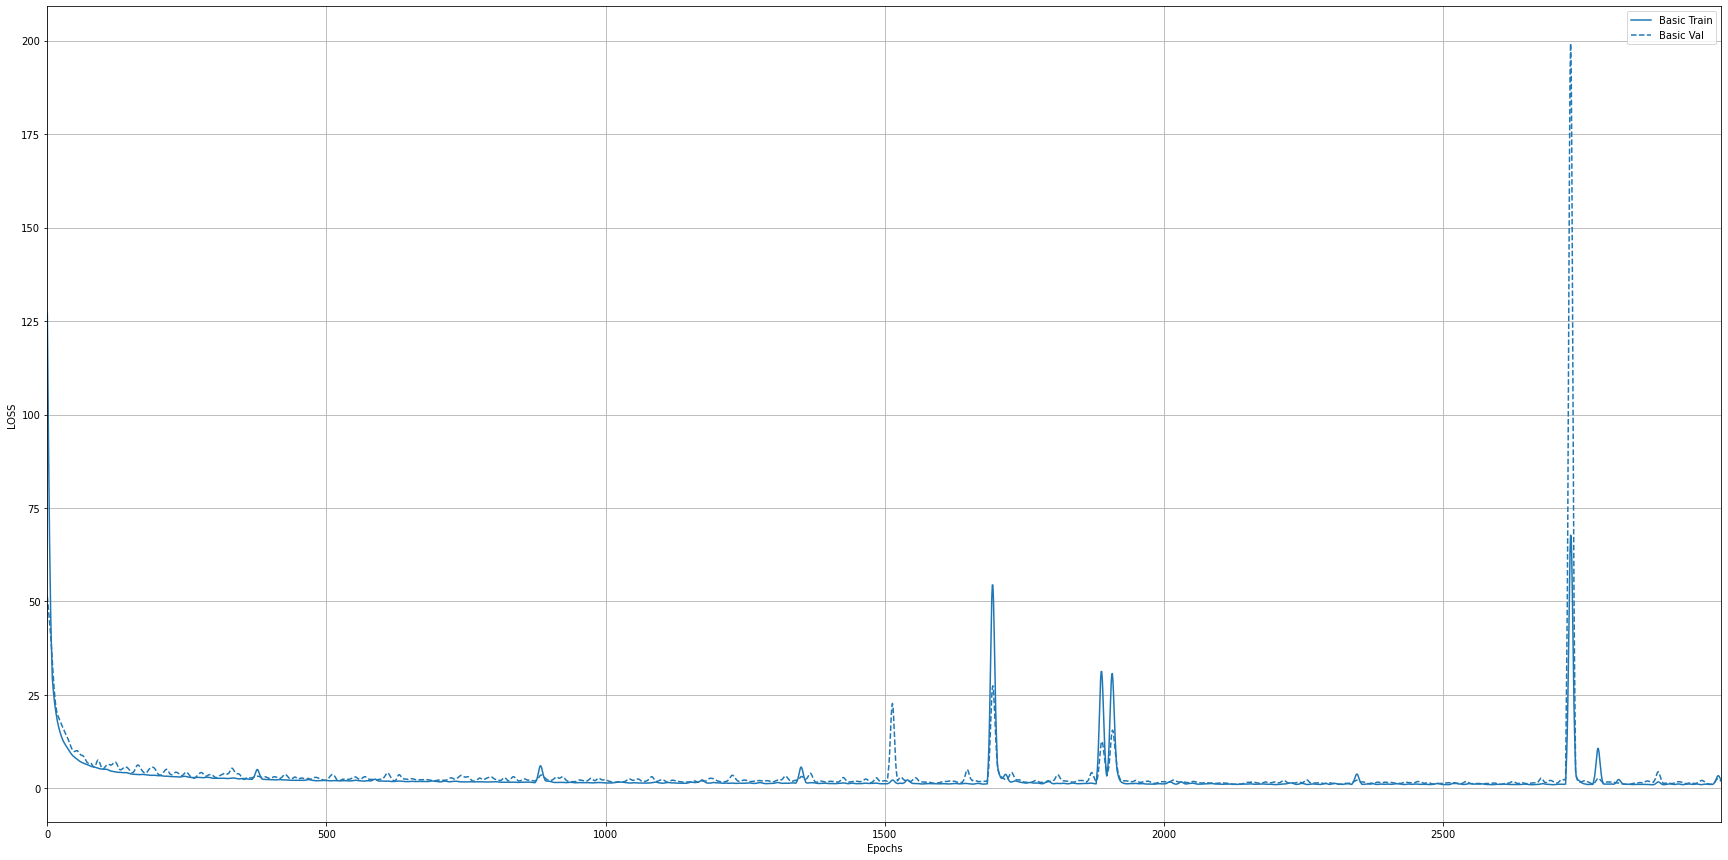

In [ ]:
plt.figure(figsize=(30,15))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "loss")
# plt.ylim([0, 60])
plt.ylabel('LOSS')

Text(0, 0.5, 'ACCURACY')

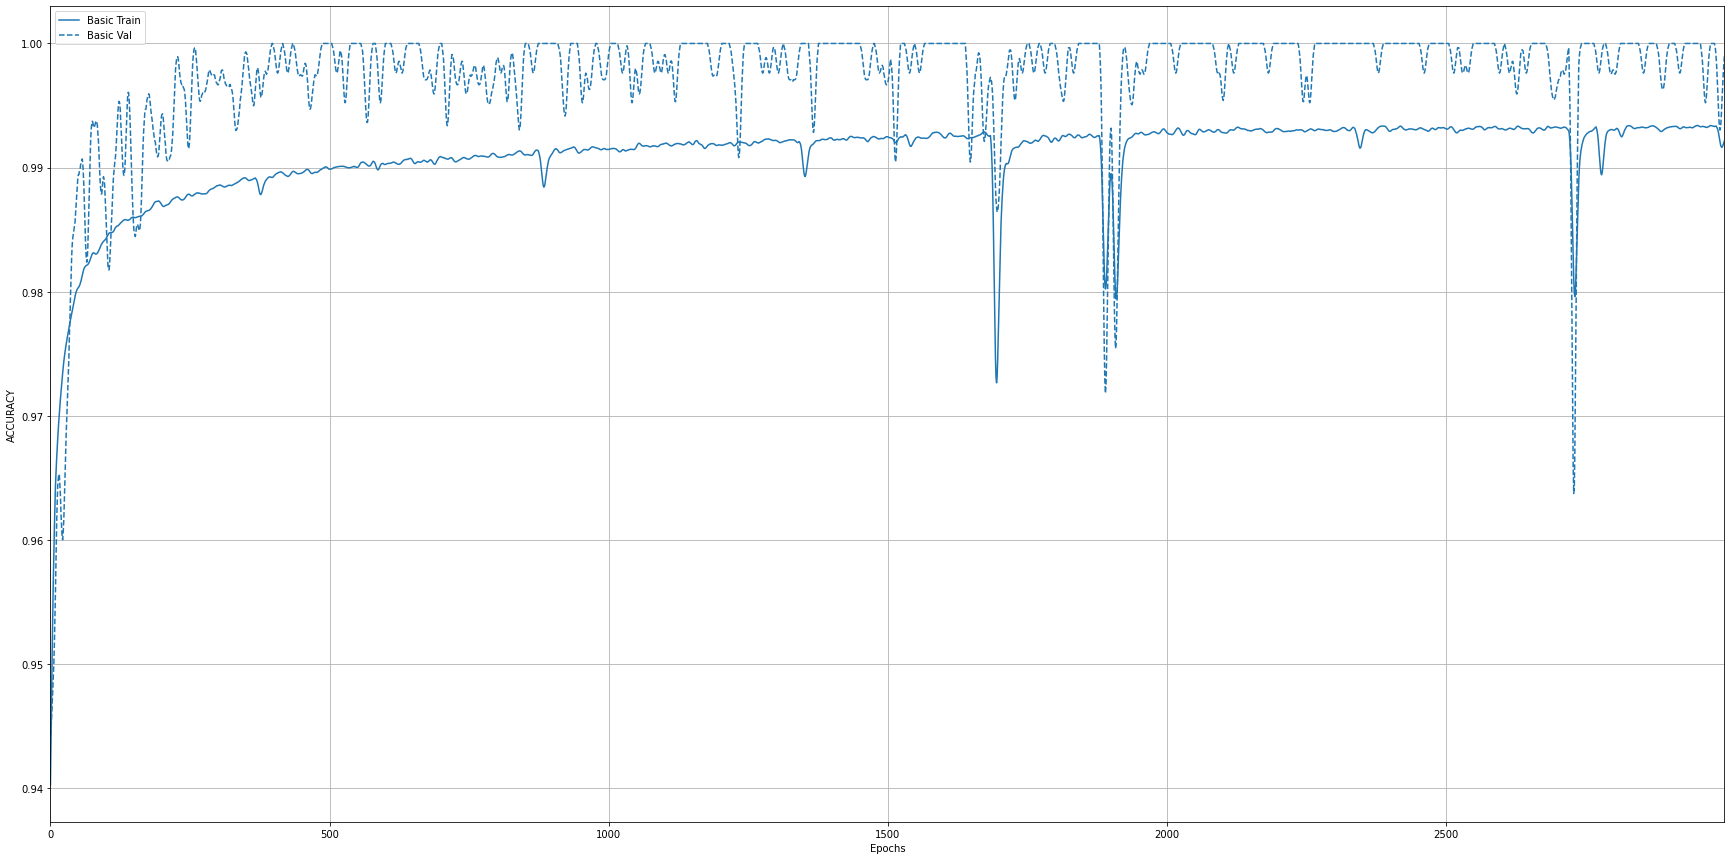

In [ ]:
plt.figure(figsize=(30,15))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "accuracy")
# plt.ylim([0, 1])
plt.ylabel('ACCURACY')

# test_loss, test_acc = CNN.evaluate(x_test,  Y_test, verbose=2)

Text(0, 0.5, 'MAE')

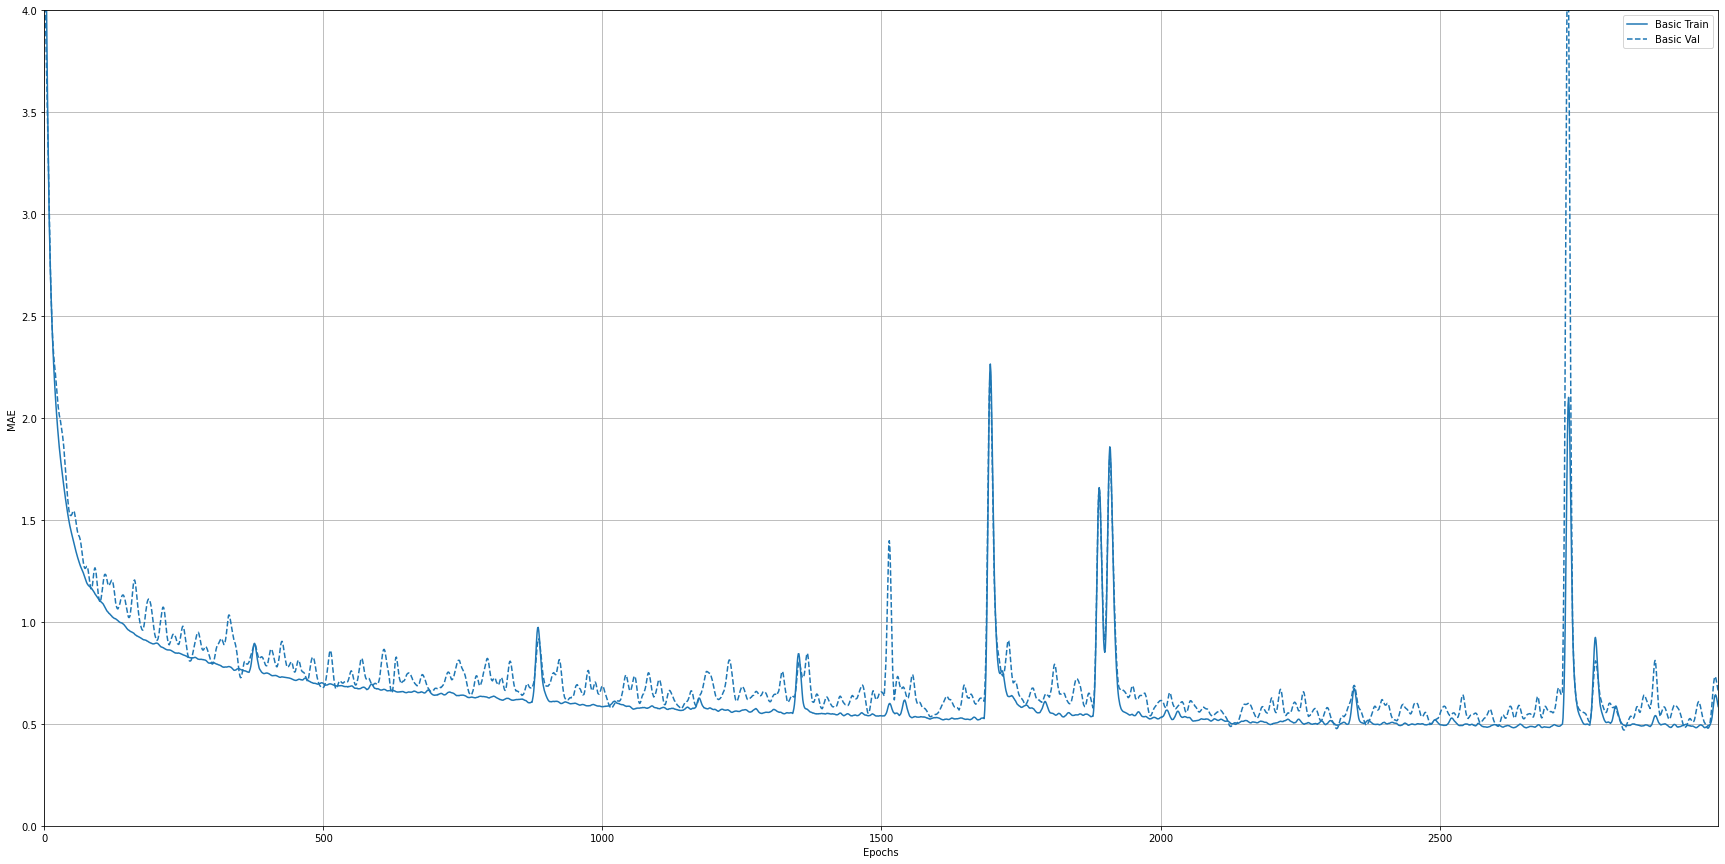

In [ ]:
plt.figure(figsize=(30,15))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 4])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

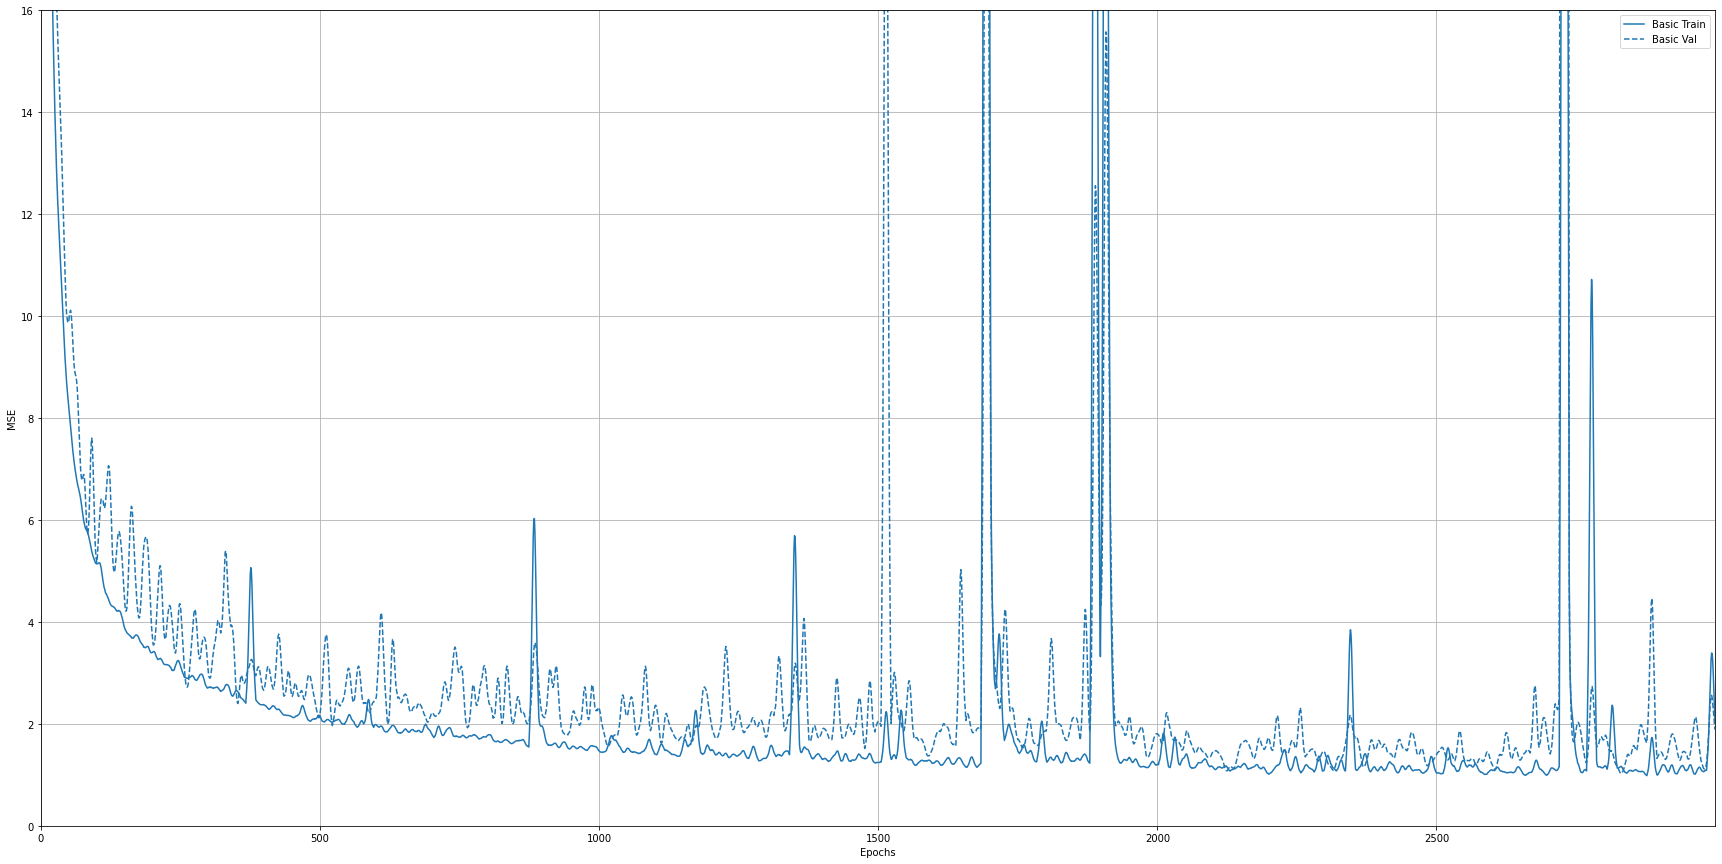

In [ ]:
plt.figure(figsize=(30,15))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 16])
plt.ylabel('MSE')

In [ ]:
loss, accuracy, mae, mse = CNN.evaluate(X_test_CNN, Y_test_CNN, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

2/2 - 0s - loss: 1.0681 - accuracy: 1.0000 - mae: 0.5234 - mse: 1.0681
Testing set Mean Abs Error:  0.52 MPG


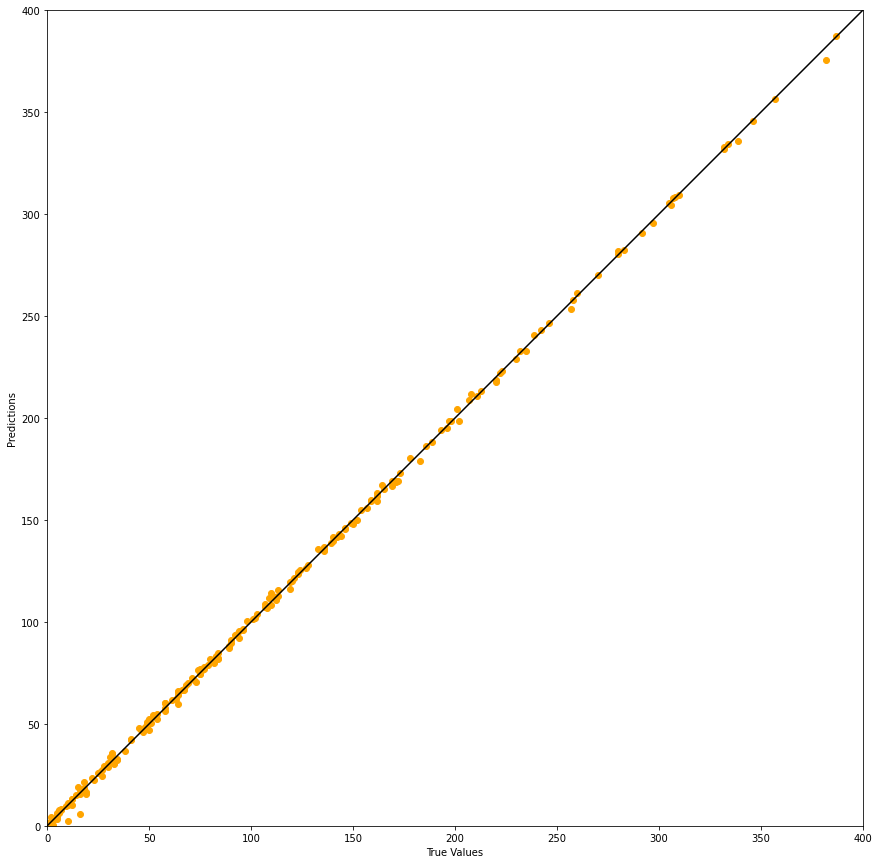

In [ ]:
test_predictions = CNN.predict(X_test_CNN).flatten()

plt.figure(figsize=(15,15))
a = plt.axes(aspect='equal')
plt.scatter(Y_test_CNN, test_predictions, color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 400]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color='black')

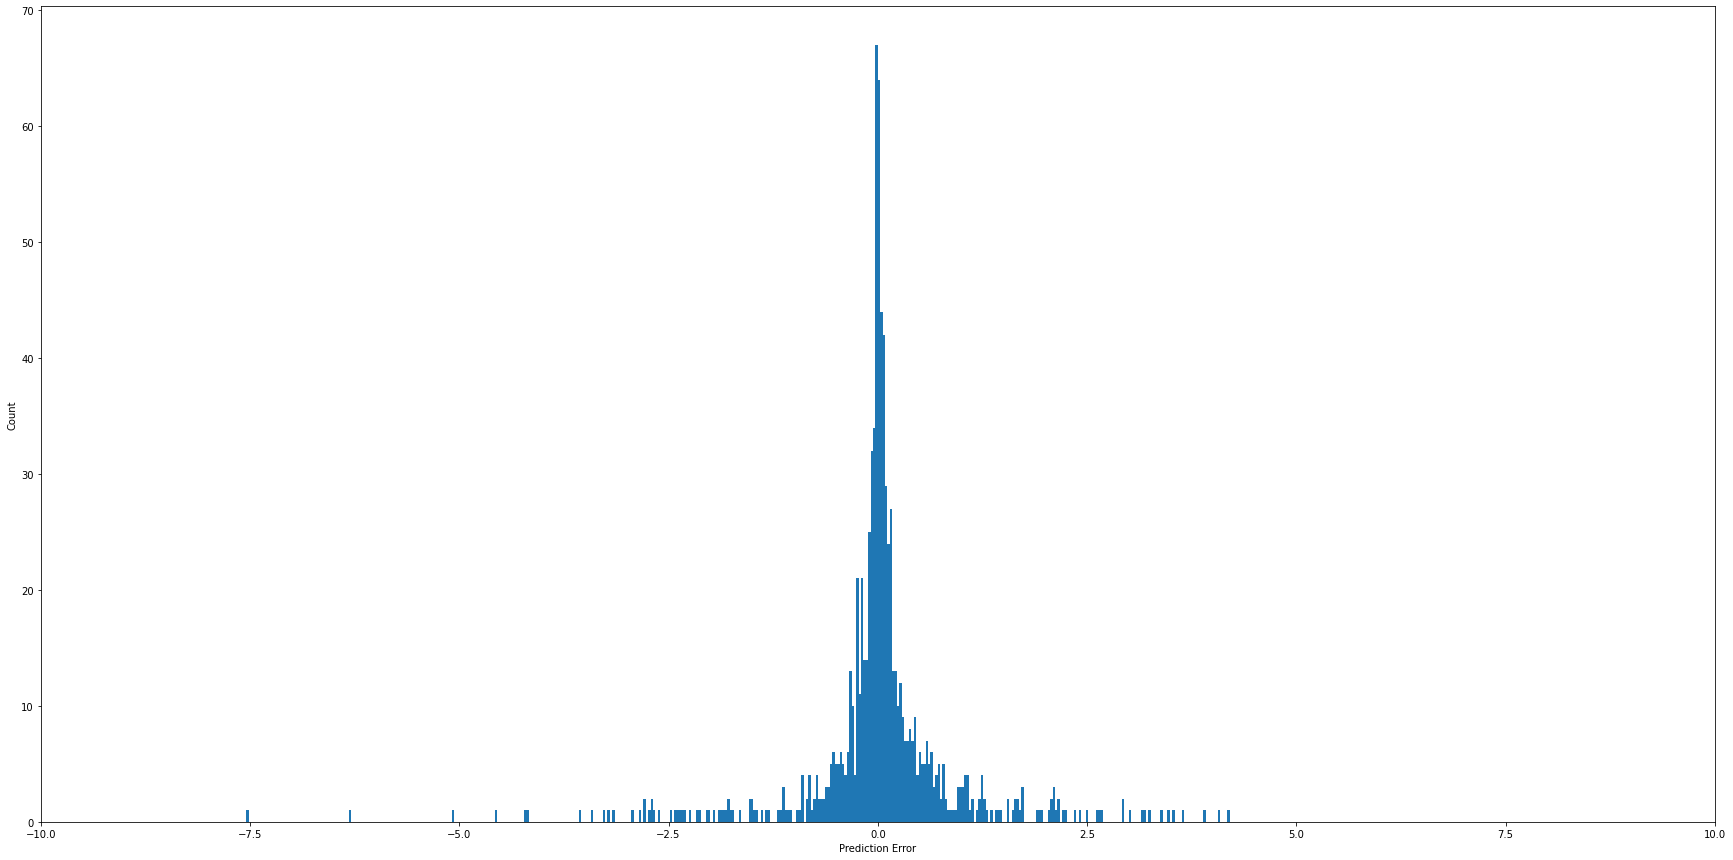

In [ ]:
error = test_predictions.flatten() - np.array(Y_test_CNN).flatten()
plt.figure(figsize=(30, 15))
plt.hist(error, bins = 500)
plt.xlim([-10, 10])
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [ ]:
# Number of samples
n = 3
x, y = create_n_cases(n=3)

# Normalizing
x -= mean
# x /= np.std(X, axis=0)

# Reshaping
x = x.reshape((3, 9, 12, 1))

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power did not converge in 10 iterations.

Did not converge (0.08 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              9     Total Gen Capacity     820.0        -900.0 to 900.0
Generators         3     On-line Capacity       820.0        -900.0 to 900.0
Committed Gens     3     Generation (actual)  -19153.0           815190.0
Loads              3     Load                   771.0             120.0
  Fixed            3       Fixed                771.0             120.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           9     Losses (I^2 * Z)     151310.79          1330423.37
Transformers     

In [ ]:
y_pred = CNN.predict(x)
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True)
for i in range(len(y)):
  print('Case:', str(i + 1))
  table_pred = pd.DataFrame(y_pred[i].reshape(9, 2)).rename(columns={0:"Generation P (Prediction)", 1:"Generation Q (Prediction)"})
  table_actu = pd.DataFrame(y[i].reshape(9, 2)).rename(columns={0:"Generation P (True Value)", 1:"Generation Q (True Value)"})
  table = table_actu.copy()
  table.insert(1, 'Generation P (Prediction)', table_pred['Generation P (Prediction)'])
  table.insert(3, 'Generation Q (Prediction)', table_pred['Generation Q (Prediction)'])
  display(table)
  print()

Case: 1


,Generation P (True Value),Generation P (Prediction),Generation Q (True Value),Generation Q (Prediction)
0,0.0,-0.401420,0.0,-0.176424
1,0.0,-0.301592,0.0,0.460730
2,-45.0,-45.227913,89.0,89.443909
3,0.0,-0.561829,0.0,0.044143
4,0.0,-0.152657,0.0,0.002158
5,0.0,0.348304,0.0,0.050586
6,11.0,12.743074,0.0,0.123529
7,226.0,224.611450,0.0,-0.065079
8,0.0,0.313832,0.0,0.166100



Case: 2


,Generation P (True Value),Generation P (Prediction),Generation Q (True Value),Generation Q (Prediction)
0,170.0,169.818253,67.0,66.918182
1,0.0,0.195781,0.0,-0.370815
2,91.0,89.946724,15.0,14.529804
3,0.0,-0.208835,0.0,0.058383
4,0.0,0.099604,0.0,0.026538
5,0.0,0.288580,0.0,0.073228
6,99.0,100.341103,0.0,0.005307
7,0.0,0.622381,0.0,-0.046634
8,0.0,0.025451,0.0,0.075404



Case: 3


,Generation P (True Value),Generation P (Prediction),Generation Q (True Value),Generation Q (Prediction)
0,-124.0,-121.693504,30.0,30.201191
1,0.0,-0.284206,0.0,0.907698
2,0.0,0.535467,0.0,0.606632
3,0.0,-0.372101,0.0,-0.136823
4,92.0,92.520256,0.0,-0.042954
5,176.0,175.870483,0.0,-0.110085
6,0.0,0.881297,0.0,-0.027453
7,0.0,-0.302840,0.0,0.061926
8,0.0,0.365462,0.0,-0.041741


#### <font color="darkblue">**Saving model**</font>

In [ ]:
CNN.save('drive/My Drive/Codes/research2020/models/CNN_week6_vargen')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: drive/My Drive/Codes/research2020/models/CNN_week6_vargen/assets


#### <font color="darkblue">**Loading Model**</font>

In [ ]:
CNN = tf.keras.models.load_model('drive/My Drive/Codes/research2020/models/CNN_week6')

### <font color='olive'>**ResNet**</font>

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import datasets, layers, models, activations
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.models import Model

In [ ]:
X_train_resnet = np.repeat(np.array(X_train), 16, axis=1)
X_train_resnet = X_train_resnet.reshape((X_train.shape[0], 36, 48, 1))

Y_train_resnet = np.array(Y_train)
# Y_train_resnet = Y_train_resnet.reshape((12000, 9, 2, 1))

X_test_resnet = np.repeat(np.array(X_test), 16, axis=1)
X_test_resnet = X_test_resnet.reshape((X_test.shape[0], 36, 48, 1))

Y_test_resnet = np.array(Y_test)
# Y_test_resnet = Y_test_resnet.reshape((3000, 9, 2, 1))

In [ ]:
base_resnet = ResNet50(include_top=True, weights=None, input_shape=(36, 48, 1))
x = base_resnet.output
y = Dense(1024, activation=tf.nn.leaky_relu)(x)
z = Dense(1024, activation=tf.nn.leaky_relu)(y)
predictions = Dense(18, activation=tf.nn.leaky_relu)(z)
resnet = Model(inputs=base_resnet.input, outputs=predictions)

In [ ]:
resnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 36, 48, 1)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 42, 54, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 18, 24, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 18, 24, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
resnet.compile('adam', loss='mse', metrics=['accuracy', 'mae', 'mse'])

In [ ]:
!export CUDA_VISIBLE_DEVICES=1
history = resnet.fit(X_train_resnet, Y_train_resnet, epochs=2000,
                    validation_data=(X_test_resnet, Y_test_resnet), verbose=2, )

Train on 25200 samples, validate on 868 samples
Epoch 1/2000
 - 84s - loss: 4247.9755 - accuracy: 0.1963 - mae: 37.0326 - mse: 4247.9746 - val_loss: 4176.0752 - val_accuracy: 0.1671 - val_mae: 37.4449 - val_mse: 4176.0752
Epoch 2/2000
 - 64s - loss: 4206.7380 - accuracy: 0.1968 - mae: 37.2639 - mse: 4206.7373 - val_loss: 4179.9936 - val_accuracy: 0.1671 - val_mae: 37.0057 - val_mse: 4179.9932
Epoch 3/2000
 - 64s - loss: 4208.8022 - accuracy: 0.1979 - mae: 37.2562 - mse: 4208.8018 - val_loss: 4175.9529 - val_accuracy: 0.1671 - val_mae: 36.4140 - val_mse: 4175.9526
Epoch 4/2000
 - 65s - loss: 4208.4319 - accuracy: 0.1973 - mae: 37.2610 - mse: 4208.4272 - val_loss: 4184.5891 - val_accuracy: 0.1671 - val_mae: 36.2251 - val_mse: 4184.5894
Epoch 5/2000
 - 64s - loss: 4207.6633 - accuracy: 0.1979 - mae: 37.2657 - mse: 4207.6636 - val_loss: 4180.2546 - val_accuracy: 0.1671 - val_mae: 36.4420 - val_mse: 4180.2549
Epoch 6/2000
 - 64s - loss: 4207.1403 - accuracy: 0.1978 - mae: 37.2650 - mse: 420

KeyboardInterrupt: ignored

# <font color='orange'>**Decentrilized learning Models**

## <font color='purple'>**Dataset**</font>

In [ ]:
# importing saved X and Y from multiple files
import os
import glob

all_filenames_X = [i for i in glob.glob('drive/My Drive/Codes/research2020/dataset/X_braches_vargen*.csv')]
all_filenames_X
X = pd.concat([pd.read_csv(f, header=None) for f in all_filenames_X ])

all_filenames_Y = [i for i in glob.glob('drive/My Drive/Codes/research2020/dataset/Y_braches_vargen*.csv')]
all_filenames_Y
Y = pd.concat([pd.read_csv(f, header=None) for f in all_filenames_Y ])

In [ ]:
# importing saved X and Y from a single file
X = pd.read_csv('drive/My Drive/Codes/research2020/X_braches.csv',header=None)
Y = pd.read_csv('drive/My Drive/Codes/research2020/Y_braches.csv',header=None)

In [ ]:
print(X.shape)
print(Y.shape)

(42000, 108)
(42000, 18)


In [ ]:
X_copy = X.copy(deep=True)
X_copy = X_copy.values.reshape(42000, 9, 12)
X_copy.shape
bus_num = 4
from_bus = X_copy[:,:,0] == bus_num
to_bus = X_copy[:,:,1] == bus_num
x = X_copy[from_bus | to_bus]
x = x.reshape(42000, 3, 12)
X = x.reshape(42000, 36)
X = pd.DataFrame(X)
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)
print(X.shape)
print(Y.shape)

(42000, 36)
(42000, 18)


In [ ]:
# type(X)
X = pd.concat([X, Y], axis=1)

In [ ]:
# partition data to training and testing datasets
X_train = X.sample(frac=0.80,random_state=0)
X_test = X.drop(X_train.index)

Y_train = Y.sample(frac=0.80,random_state=0)
Y_test = Y.drop(Y_train.index)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(33600, 54)
(8400, 54)


## <font color='purple'>**Models**</font>

### <font color='olive'>**Basic Neural Network**</font><br>

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(54, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(64, activation='relu'),

    layers.Dense(18)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [ ]:
DecBasicNN = build_model()

In [ ]:
DecBasicNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_17 (Dense)             (None, 512)               28160     
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_22 (Dense)             (None, 256)              

In [ ]:
example_batch = X[:3]
example_result = DecBasicNN.predict(example_batch)
example_result

array([[ 4.8,  4.1, -1.3,  3.3,  0.8, -4.5, -0.2, -3.3, -0. , -3.7, -2.5,
         1.7, -2.7, -6.8,  2.2,  1.3,  2.3,  0.6],
       [ 4.2,  5.3, -0.6,  0.2,  1.3, -4.7, -0.5, -0.4,  0.4, -3.8, -1.2,
         0.7, -2.2, -5.4,  1.4,  2.6,  1. ,  1.1],
       [ 4.2,  6.1, -0.5,  0.7,  2. , -4. , -0.9, -0.4,  0.8, -4.3, -2.3,
         0.1, -2.2, -5.8,  1.8,  2.3,  1.3,  0.1]], dtype=float32)

In [ ]:
EPOCHS = 2000

history = DecBasicNN.fit(
  X_train, Y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=2,
  callbacks=[tfdocs.modeling.EpochDots()])

Epoch 1/2000

Epoch: 0, loss:392.5355,  mae:9.7963,  mse:392.5355,  val_loss:54.0290,  val_mae:4.9314,  val_mse:54.0290,  
.840/840 - 3s - loss: 392.5355 - mae: 9.7963 - mse: 392.5355 - val_loss: 54.0290 - val_mae: 4.9314 - val_mse: 54.0290
Epoch 2/2000
.840/840 - 2s - loss: 36.0726 - mae: 3.9133 - mse: 36.0726 - val_loss: 24.2070 - val_mae: 3.2176 - val_mse: 24.2070
Epoch 3/2000
.840/840 - 2s - loss: 31.9123 - mae: 3.5811 - mse: 31.9123 - val_loss: 26.5311 - val_mae: 3.3957 - val_mse: 26.5311
Epoch 4/2000
.840/840 - 2s - loss: 30.4596 - mae: 3.3898 - mse: 30.4596 - val_loss: 25.4920 - val_mae: 3.2374 - val_mse: 25.4920
Epoch 5/2000
.840/840 - 2s - loss: 24.1072 - mae: 2.9925 - mse: 24.1072 - val_loss: 34.5645 - val_mae: 3.4419 - val_mse: 34.5645
Epoch 6/2000
.840/840 - 2s - loss: 29.1806 - mae: 3.2126 - mse: 29.1806 - val_loss: 26.3014 - val_mae: 3.0854 - val_mse: 26.3014
Epoch 7/2000
.840/840 - 2s - loss: 26.0327 - mae: 2.9674 - mse: 26.0327 - val_loss: 18.3286 - val_mae: 2.5238 - va

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1995,0.851692,0.384774,0.851692,1.008395,0.428914,1.008395,1995
1996,0.943869,0.396667,0.943869,0.563196,0.316254,0.563196,1996
1997,0.707779,0.342392,0.707779,0.779763,0.357465,0.779763,1997
1998,1.373384,0.459381,1.373384,0.804744,0.444848,0.804744,1998
1999,0.457328,0.272146,0.457328,0.405235,0.260174,0.405235,1999


Text(0, 0.5, 'LOSS')

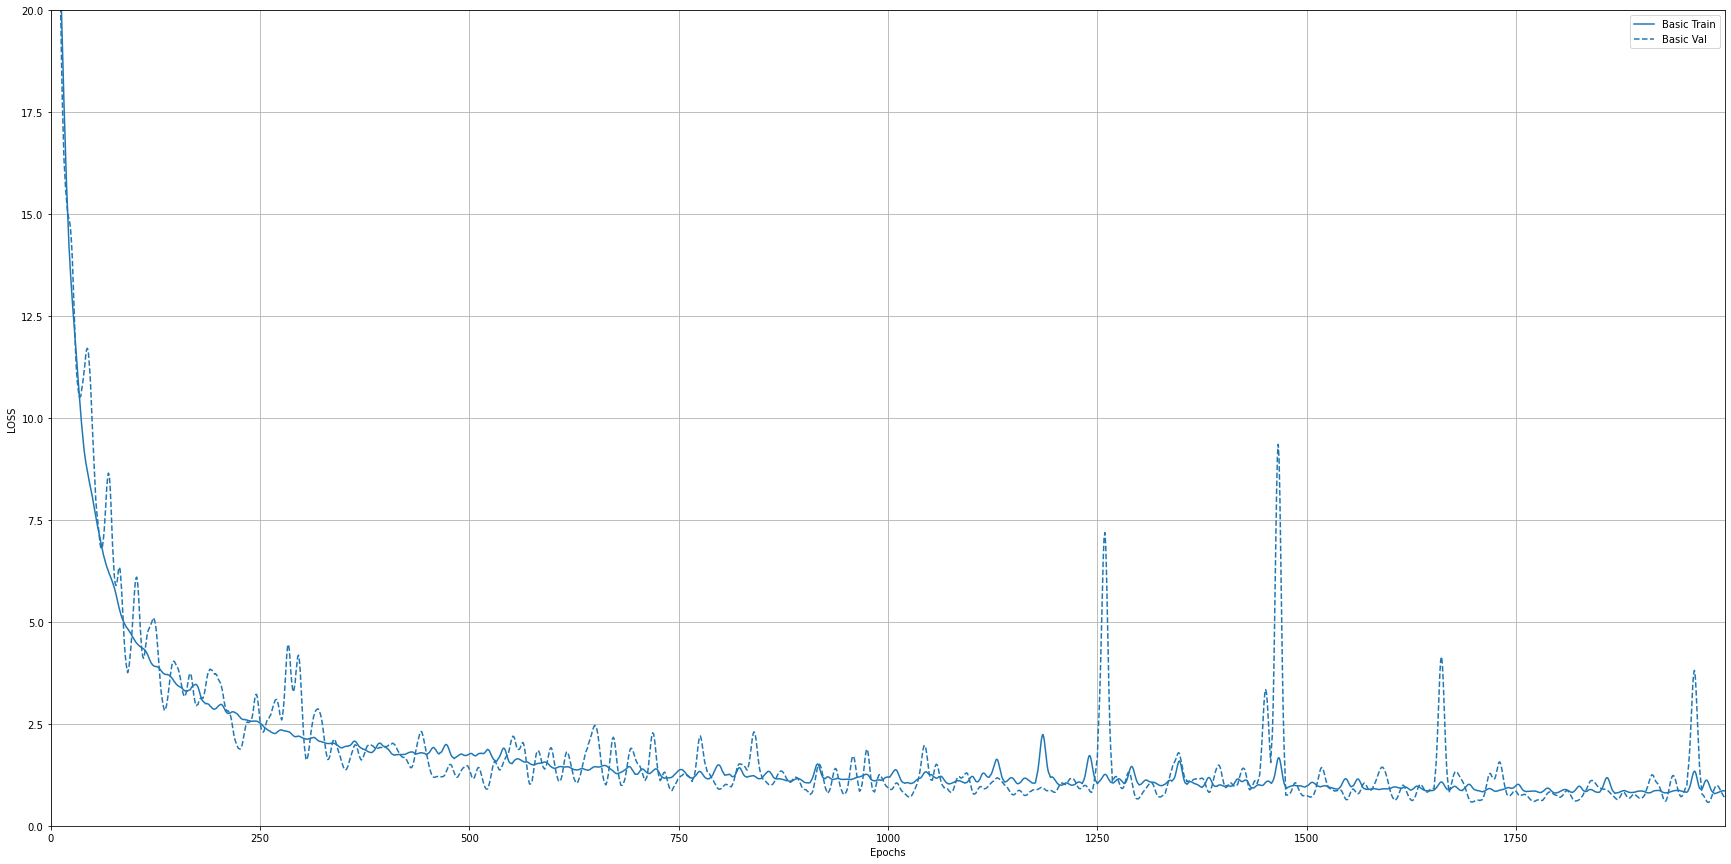

In [ ]:
plt.figure(figsize=(30,15))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 20])
plt.ylabel('LOSS')

Text(0, 0.5, 'MAE')

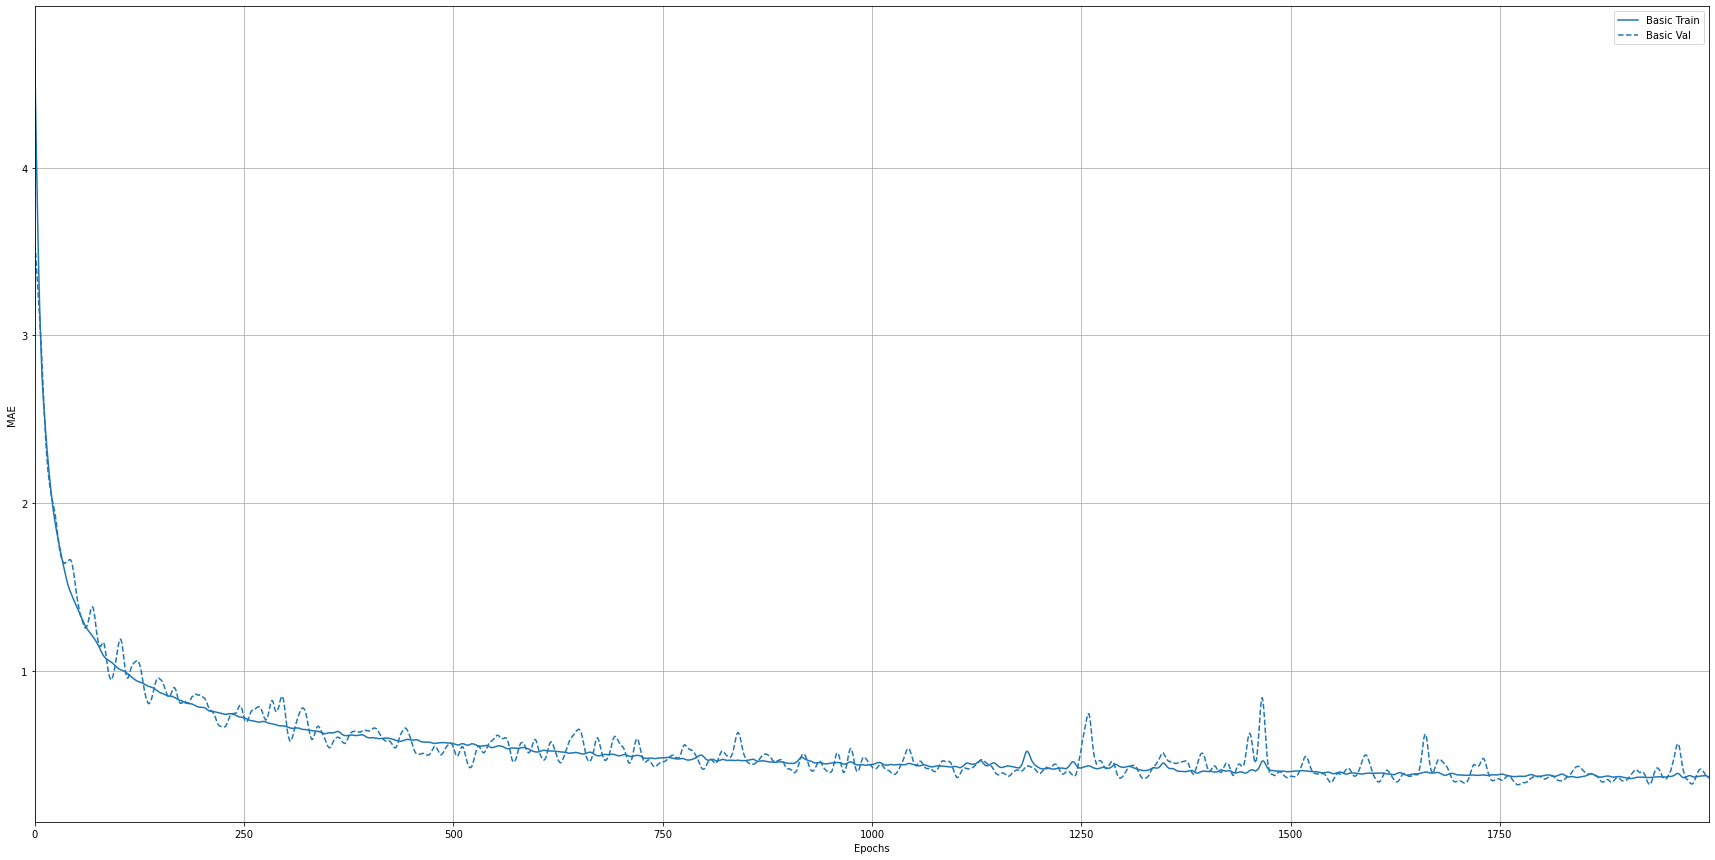

In [ ]:
plt.figure(figsize=(30,15))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([0, 10])
plt.ylabel('MAE')

In [ ]:
loss, mae, mse = DecBasicNN.evaluate(X_test, Y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

263/263 - 0s - loss: 0.4097 - mae: 0.2595 - mse: 0.4097
Testing set Mean Abs Error:  0.26 MPG


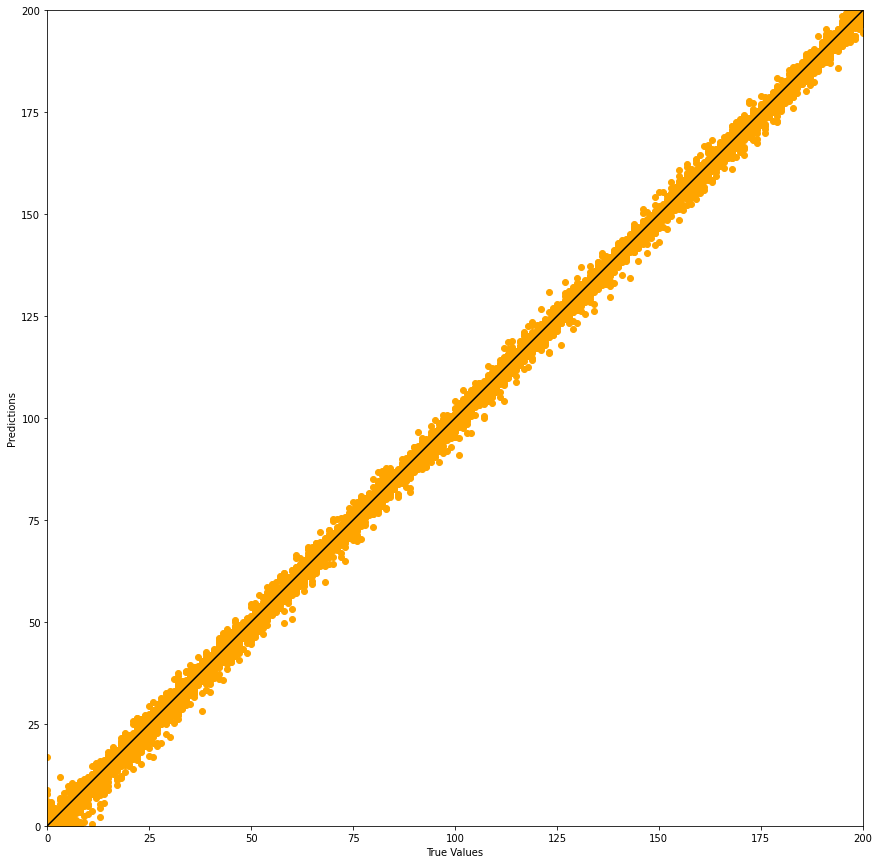

In [ ]:
test_predictions = DecBasicNN.predict(X_test).flatten()

plt.figure(figsize=(15,15))
a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions, color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color='black')

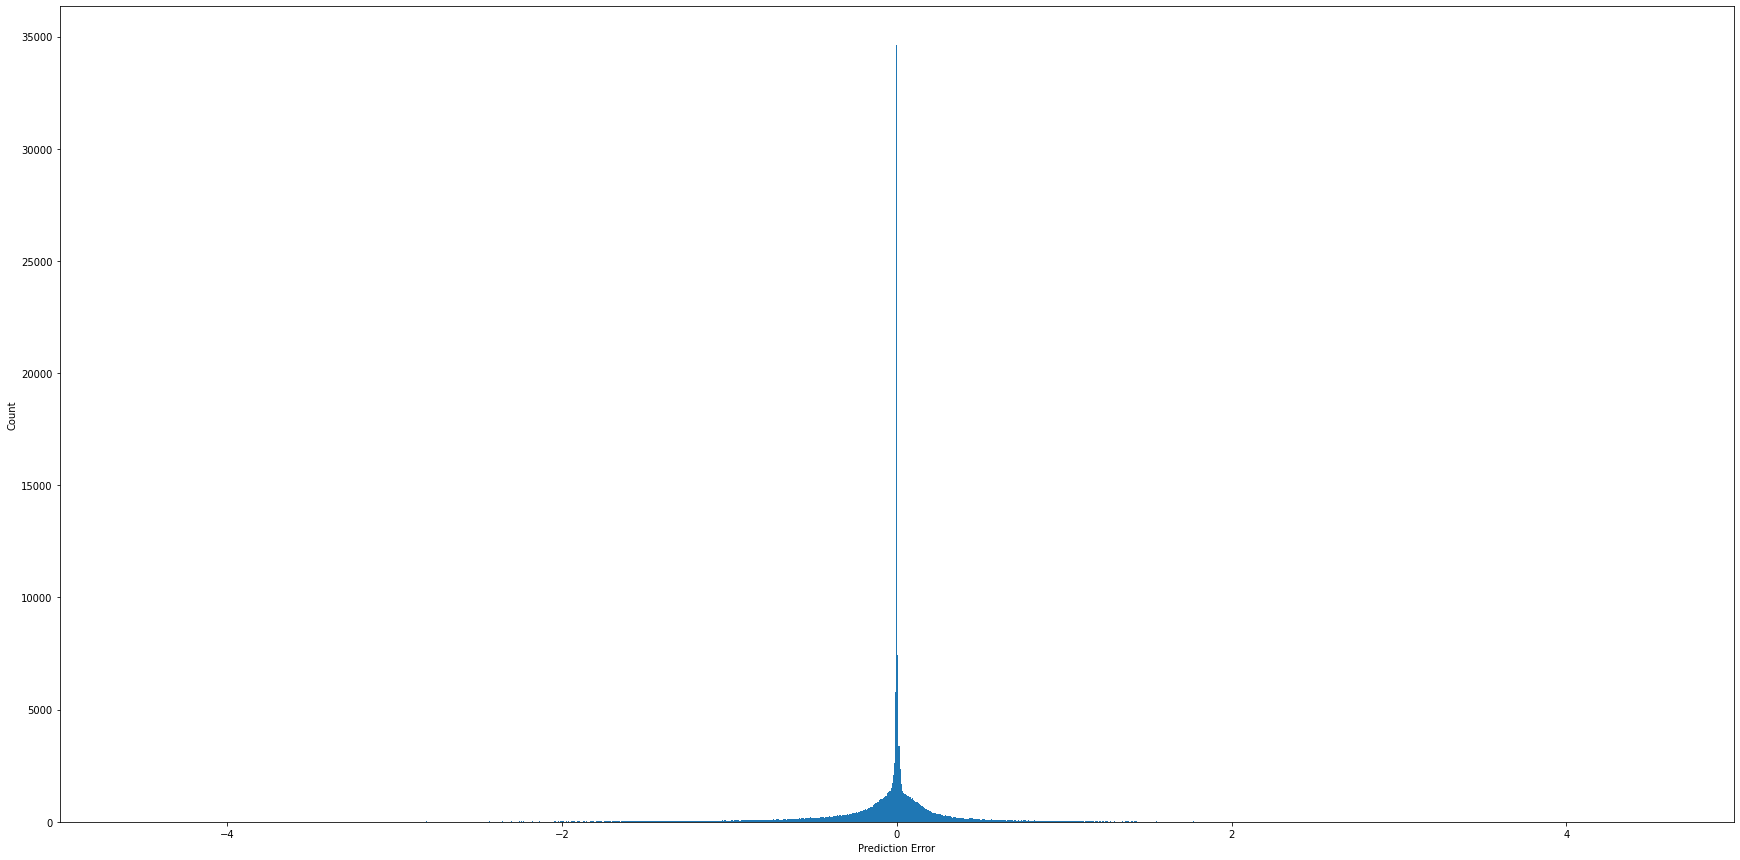

In [ ]:
error = test_predictions.flatten() - np.array(Y_test).flatten()
plt.figure(figsize=(30, 15))
plt.hist(error, bins = 5000)
plt.xlim([-5, 5])
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

error_hist = np.histogram(error, bins=500)
max_likelihood = np.amax(error_hist[0])
idx = find_nearest(error_hist[1], .436157)
print('index:\t\t', idx)
print('value:\t\t', error_hist[0][idx])
print('max likelihood:\t', max_likelihood)

# print(error_hist[1].shape)
# error_hist[1][(error_hist[1] < 25) & (error_hist[1] > -25)].shape

import statistics
print('STD:\t\t {:.2f}'.format(statistics.stdev(error_hist[1])))

cutoff = 1
confidence = error[(error < cutoff) & (error > -cutoff)].shape[0] / error.shape[0]
print('\nConfidence:\t {:.2f} / 1'.format(confidence))

def estConf(cutoff):
    confidence = error[(error < cutoff) & (error > -cutoff)].shape[0] / error.shape[0]
    return confidence

print("Estimated conf: {:.4f}".format(100 * estConf(1)))


index:		 169
value:		 1305
max likelihood:	 63184
STD:		 9.71

Confidence:	 0.94 / 1
Estimated conf: 94.1263


In [ ]:
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',
              'lognorm','pearson3','triang']
import scipy
y_std = error[(error >= -.1) & (error < 15)]
chi_square_statistics = []
# 11 equi-distant bins of observed Data
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * y_std.shape[0]
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)

(0.9595737906653534, -0.09999082982540132, 0.21081313372636762)

(0.11555951075635224, 0.37232793877943177)

(0.38066433469302685, 12.005157470703127, 1.4680117064749019)



/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(1.1340778230780535, 196.24047594010025, -0.09999129289235162, 37.725082321887456)

(0.9616464067992687, -0.11469943358857049, 0.23944345326244199)

(-0.0999908298254013, 12.105148300528526)

(0.36248176648028174, -0.09999082982540132, 1.9488625408780655)

(-0.0999908298254013, 0.21555034058175354)

(0.8253492742678811, -0.10754196360665967, 0.14321714673561275)

(1.8637175198721687, 0.1155567219657268, 0.2008604152729065)

(0.08118036774440512, -1.116511645686284, 13.121863691691729)


Distributions listed by Betterment of fit:
............................................
   Distribution     chi_square
8       lognorm   40035.795638
4      invgauss   42966.999920
9      pearson3   53865.809655
3          beta   54428.159585
7         expon   64582.523843
0   weibull_min   71897.989778
6         gamma  122230.539814
1          norm  260734.097921
10       triang  467698.036266
5       uniform  487902.333032
2   weibull_max  512855.623822


4.2318706811209115


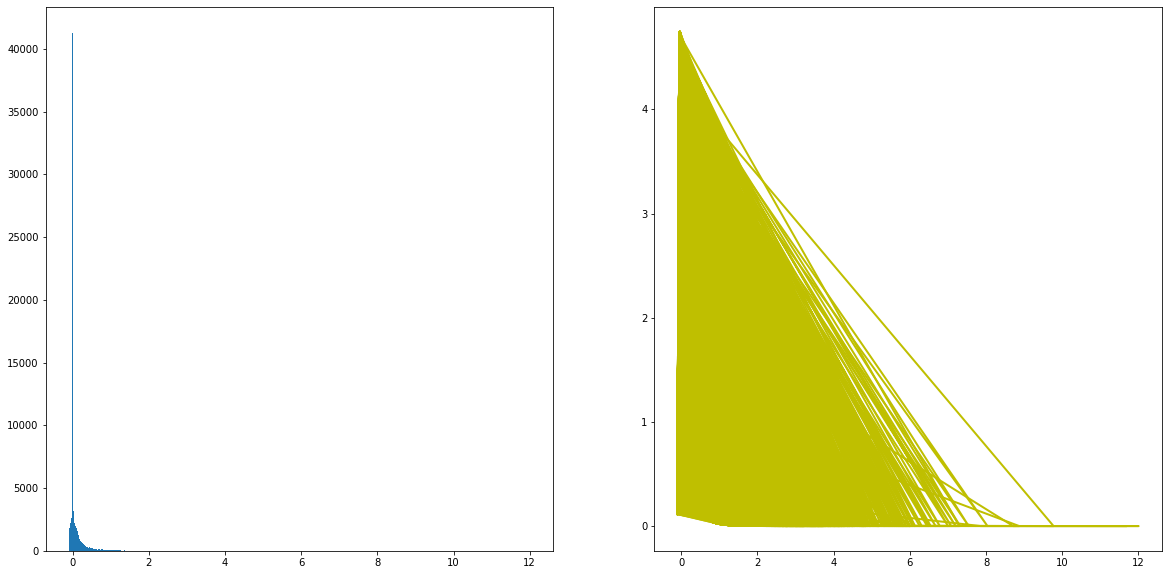

In [ ]:
from scipy.stats import *
plt.rcParams['agg.path.chunksize'] = 10000

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# axes[0].set_xlim([0, 7])
# axes[0].set_ylim([0, 2000])
# axes[1].set_xlim([0, 7])
# axes[1].set_ylim([0, 2000])


# Histogram Plot of Observed Data
axes[0].hist(y_std, bins=1000)
#Beta Distribution Fitting
axes[1].plot(y_std, lognorm.pdf(y_std, 0.8253492742678811, -0.10754196360665967, 0.14321714673561275), 'y-', lw=2)

print(lognorm.pdf(0, 0.8253492742678811, -0.10754196360665967, 0.14321714673561275))

In [ ]:
# Number of samples
n = 3
x, y = create_n_cases(n=n)

x = pd.DataFrame(x)
y = pd.DataFrame(y)

x_copy = x.copy(deep=True)
x_copy = x_copy.values.reshape(n, 9, 12)
x_copy.shape

from_bus = x_copy[:,:,0] == bus_num
to_bus = x_copy[:,:,1] == bus_num
x_copy = x_copy[from_bus | to_bus]
x_copy = x_copy.reshape(n, 3, 12)
x = x_copy.reshape(n, 36)
x = pd.DataFrame(x)
x.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

x = pd.concat([x, y], axis=1)

x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

# Normalizing
# x -= mean
# x /= np.std(X, axis=0)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Power Flow (Newton)


Newton's method power did not converge in 10 iterations.

Did not converge (0.05 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              9     Total Gen Capacity     820.0        -900.0 to 900.0
Generators         3     On-line Capacity       820.0        -900.0 to 900.0
Committed Gens     3     Generation (actual)    599.0             870.0
Loads              3     Load                   530.0             141.0
  Fixed            3       Fixed                530.0             141.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches           9     Losses (I^2 * Z)        82.47            816.85
Transformers       0  

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def fail_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """

    if val == "F":
      color = 'red'
    elif val == "OK":
      color = 'green'
    else:
      color = 'black'
    return 'color: %s' % color


# x[0][-6] = 90

y_pred = DecBasicNN.predict(x)
np.set_printoptions(precision=1)
np.set_printoptions(suppress=True)
for i in range(len(y)):
  print('Case:', str(i + 1))
  table_pred = pd.DataFrame(y_pred[i].reshape(9, 2)).rename(columns={0:"Voltage Mag (Prediction)", 1:"Voltage Ang (Prediction)"})
  table_actu = pd.DataFrame(y[i].reshape(9, 2)).rename(columns={0:"Voltage Mag (True Value)", 1:"Voltage Ang (True Value)"})
  table = table_actu.copy()

  table.insert(1, 'Voltage Mag (Prediction)', table_pred['Voltage Mag (Prediction)'])
  table.insert(2, '%{:.0f} Confidence interval Volt Mag'.format(100 * confidence), ["[{:.1f}, {:.1f}]".format(i-cutoff, i+cutoff) for i in table_pred['Voltage Mag (Prediction)']])
  table.insert(3, 'is in interval Mag', ["OK" if real < pred+cutoff and real > pred-cutoff else "F" for real, pred in zip(table['Voltage Mag (True Value)'], table['Voltage Mag (Prediction)'])])
  table.insert(5, 'Voltage Ang (Prediction)', table_pred['Voltage Ang (Prediction)'])
  table.insert(6, '%{:.0f} Confidence interval Volt Ang'.format(100 * confidence), ["[{:.1f}, {:.1f}]".format(i-cutoff, i+cutoff) for i in table_pred['Voltage Ang (Prediction)']])
  table.insert(7, 'is in interval Ang', ["OK" if real < pred+cutoff and real > pred-cutoff else "F" for real, pred in zip(table['Voltage Ang (True Value)'], table['Voltage Ang (Prediction)'])])

  # table = table.style.applymap(fail_red)
  display(table)
  print()

Case: 1


,Voltage Mag (True Value),Voltage Mag (Prediction),%94 Confidence interval Volt Mag,is in interval Mag,Voltage Ang (True Value),Voltage Ang (Prediction),%94 Confidence interval Volt Ang,is in interval Ang
0,-2.0,-2.321401,"[-3.3, -1.3]",OK,8.0,7.027777,"[6.0, 8.0]",OK
1,0.0,-0.116166,"[-1.1, 0.9]",OK,0.0,-0.150130,"[-1.2, 0.8]",OK
2,0.0,-0.078307,"[-1.1, 0.9]",OK,0.0,-0.094880,"[-1.1, 0.9]",OK
3,0.0,0.220623,"[-0.8, 1.2]",OK,0.0,0.000493,"[-1.0, 1.0]",OK
4,0.0,0.367622,"[-0.6, 1.4]",OK,0.0,0.000272,"[-1.0, 1.0]",OK
5,0.0,0.096601,"[-0.9, 1.1]",OK,0.0,-0.001072,"[-1.0, 1.0]",OK
6,41.0,89.738701,"[88.7, 90.7]",F,0.0,0.001573,"[-1.0, 1.0]",OK
7,0.0,0.145625,"[-0.9, 1.1]",OK,0.0,0.005529,"[-1.0, 1.0]",OK
8,178.0,184.356888,"[183.4, 185.4]",F,0.0,-0.001076,"[-1.0, 1.0]",OK



Case: 2


,Voltage Mag (True Value),Voltage Mag (Prediction),%94 Confidence interval Volt Mag,is in interval Mag,Voltage Ang (True Value),Voltage Ang (Prediction),%94 Confidence interval Volt Ang,is in interval Ang
0,397.0,398.276001,"[397.3, 399.3]",F,137.0,136.127563,"[135.1, 137.1]",OK
1,20.0,19.732267,"[18.7, 20.7]",OK,-2.0,-2.830377,"[-3.8, -1.8]",OK
2,0.0,0.035631,"[-1.0, 1.0]",OK,0.0,0.130764,"[-0.9, 1.1]",OK
3,0.0,-0.140156,"[-1.1, 0.9]",OK,0.0,0.002441,"[-1.0, 1.0]",OK
4,0.0,0.026876,"[-1.0, 1.0]",OK,0.0,-0.001694,"[-1.0, 1.0]",OK
5,0.0,0.099228,"[-0.9, 1.1]",OK,0.0,0.024842,"[-1.0, 1.0]",OK
6,15.0,15.555200,"[14.6, 16.6]",OK,0.0,0.000957,"[-1.0, 1.0]",OK
7,0.0,-0.161507,"[-1.2, 0.8]",OK,0.0,0.003687,"[-1.0, 1.0]",OK
8,0.0,0.315408,"[-0.7, 1.3]",OK,0.0,0.002546,"[-1.0, 1.0]",OK



Case: 3


,Voltage Mag (True Value),Voltage Mag (Prediction),%94 Confidence interval Volt Mag,is in interval Mag,Voltage Ang (True Value),Voltage Ang (Prediction),%94 Confidence interval Volt Ang,is in interval Ang
0,0.0,0.156668,"[-0.8, 1.2]",OK,0.0,0.075681,"[-0.9, 1.1]",OK
1,151.0,150.746094,"[149.7, 151.7]",OK,36.0,35.875343,"[34.9, 36.9]",OK
2,327.0,326.299561,"[325.3, 327.3]",OK,58.0,57.116119,"[56.1, 58.1]",OK
3,0.0,-0.450464,"[-1.5, 0.5]",OK,0.0,0.000941,"[-1.0, 1.0]",OK
4,0.0,0.038738,"[-1.0, 1.0]",OK,0.0,-0.001182,"[-1.0, 1.0]",OK
5,0.0,0.349390,"[-0.7, 1.3]",OK,0.0,-0.003512,"[-1.0, 1.0]",OK
6,88.0,87.614258,"[86.6, 88.6]",OK,0.0,0.000245,"[-1.0, 1.0]",OK
7,0.0,0.175544,"[-0.8, 1.2]",OK,0.0,0.007333,"[-1.0, 1.0]",OK
8,0.0,-0.290069,"[-1.3, 0.7]",OK,0.0,0.000021,"[-1.0, 1.0]",OK


#### <font color='darkblue'>**Saving model**</font>

In [ ]:
DecBasicNN.save('drive/My Drive/Codes/research2020/models/DecBasicNN_week9')

INFO:tensorflow:Assets written to: drive/My Drive/Codes/research2020/models/DecBasicNN_week9/assets


#### <font color='darkblue'>**Loading model**</font>

In [ ]:
DecBasicNN = tf.keras.models.load_model('drive/My Drive/Codes/research2020/models/DecBasicNN_week8')

### <font color='olive'>**MDN (Mixture Density Neural Network)**</font><br>

In [ ]:
!pip install tensorflow_probability

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Layer, Input

Using TensorFlow backend.


In [ ]:
def mdn_cost(mu, sigma, y):
  # to_return = []
  # for i in range(y.shape[1]):
  dist = tfp.distributions.Normal(loc=mu, scale=sigma, allow_nan_stats=False)
  # to_return.append(tf.reduce_mean(-dist.log_prob(y[i])))
  # return np.array(to_return)
  return tf.reduce_mean(-dist.log_prob(y))

# res = mdn_cost([0, 1], [1, 1], [0, 1])
# print(res)

In [ ]:
epochs = 5
batch_size = 50
learning_rate = 0.0003
InputLayer = Input(shape=(54,))
Layer_1 = Dense(128,activation="relu")(InputLayer)
Layer_2 = Dense(128,activation="relu")(Layer_1)
Layer_3 = Dense(128,activation="relu")(Layer_2)
Layer_4 = Dense(64,activation="relu")(Layer_3)
Layer_5 = Dense(64,activation="relu")(Layer_4)
Layer_6 = Dense(64,activation="relu")(Layer_5)

mu = Dense(18, activation="linear")(Layer_6)
sigma = Dense(18, activation=lambda x: tf.nn.elu(x) + 1)(Layer_6)

y_real = Input(shape=(18,))
lossF = mdn_cost(mu,sigma,y_real)
model = Model(inputs=[InputLayer, y_real], outputs=[mu, sigma])
model.add_loss(lossF)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 54)           0                                            
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 128)          7040        input_7[0][0]                    
__________________________________________________________________________________________________
dense_26 (Dense)                (None, 128)          16512       dense_25[0][0]                   
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 128)          16512       dense_26[0][0]                   
____________________________________________________________________________________________

In [ ]:
adamOptimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=adamOptimizer,metrics=['mse'])
history_cache = model.fit([X_train, Y_train], #notice we are using an input to pass the real values due to the inner workings of keras
                          verbose=2, # write =1 if you wish to see the progress for each epoch
                          epochs=epochs,
                          batch_size=batch_size)

/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output dense_31 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_31.
  'be expecting any data to be passed to {0}.'.format(name))
/usr/local/lib/python3.6/dist-packages/keras/engine/training_utils.py:819: UserWarning: Output dense_32 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_32.
  'be expecting any data to be passed to {0}.'.format(name))


Epoch 1/5
 - 4s - loss: nan
Epoch 2/5
 - 4s - loss: nan
Epoch 3/5
 - 4s - loss: nan
Epoch 4/5
 - 4s - loss: nan
Epoch 5/5
 - 4s - loss: nan


In [ ]:

print('Final cost: {0:.4f}'.format(history_cache.history['loss'][-1]))
mu_pred, sigma_pred = model.predict(list((X_test,X_test))) # the model expects a list of arrays as it has 2 inputs
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
ax.errorbar(x_test,mu_pred,yerr=np.absolute(sigma_pred),c='r',ls='None',marker='.',ms=10,label='predicted distributions')
ax.scatter(x_arr,y_arr,c='b',alpha=0.05,label='sampled data')
ax.errorbar(x_vals,list(map(f,x_vals)),yerr=list(map(lambda x: sigma_0*x,x_vals)),c='b',lw=2,ls='None',marker='.',ms=10,label='true distributions')
ax.plot(x_vals,list(map(f,x_vals)),c='m',label='f(x)')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()

Final cost: nan


ValueError: ignored